# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0,'..')

from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName
from src.exp_runner import ExperimentRunner
from src.base.experiment.base_models import BaseModel
from src.base.experiment.benchmark_dataset import BenchmarkDataset
from src.base.experiment.model_creator import Optimizer
from src.base.experiment.model_evaluator import DataSource, DataPredSelection
from src.m_utils.mtl_approach import MTLApproach
from src.m_utils.nas_mtl_approach import NAS_MTLApproach
from src.m_utils.constants import ICAO_REQ, MNIST_TASK

 ==> Restrict GPU memory growth: True


# Start Network runner

In [4]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'rerun ICAO 239',
        'description': 'Rerunning experiment ICAO 239 for generating new plots',
        'tags': ['mtl', 'handcrafted_2', 'handcrafted_2_exp', 'fvc', 'ground_truths'],
        'src_files': ["../src/**/**.py"]
    },
    'properties': {
        'approach': MTLApproach.HAND_2,
        'benchmarking': {
            'use_benchmark_data': False,
            'benchmark_dataset': BenchmarkDataset.MNIST,
            'tasks': list(MNIST_TASK)
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': True,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': list(ICAO_REQ),
            'aligned': False,
        },
        'balance_input_data': False,
        'train_model': False,
        'save_trained_model': False,
        'exec_nas': False,
        'orig_model_experiment_id': 'ICAO-239',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 200,
        'early_stopping': 200,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {
        'max_blocks_per_branch': 5,
        'n_child_epochs': 1,
        'controller_epochs': 50,
        'controller_batch_size': 32,
        'n_trials': 50
    }
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 17689
Process ID: 30510
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'Rerunning experiment ICAO 239 for generating '
                               'new plots',
                'name': 'rerun ICAO 239',
                'src_files': ['../src/**/**.py'],
                'tags': ['mtl',
                         'handcrafted_2',
                         'handcrafted_2_exp',
                         'fvc',
                         'ground_truths']},
 'nas_params': {'controller_batch_size': 32,
                'controller_epochs': 50,
                'max_blocks_per_branch': 5,
                'n_child_epochs': 1,
                'n_trials': 50},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'name': 'vgg16', 'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f971f565040>}>,
   

# Load Data

In [5]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [6]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [7]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [6]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [7]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

In [9]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Requisite: MOUTH
N_TRAIN_COMP: 3607 (73.19%)
N_TRAIN_NOT_COMP: 1321 (26.81%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 420 (76.78%)
N_VALIDATION_NOT_COMP: 127 (23.22%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 215 (74.65%)
N_TEST_NOT_COMP: 73 (25.35%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: ROTATION
N_TRAIN_COMP: 3716 (75.41%)
N_TRAIN_NOT_COMP: 1212 (24.59%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 410 (74.95%)
N_VALIDATION_NOT_COMP: 137 (25.05%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 208 (72.22%)
N_TEST_NOT_COMP: 80 (27.78%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: L_AWAY
N_TRAIN_COMP: 3375 (68.49%)
N_TRAIN_NOT_COMP: 1553 (31.51%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 382 (69.84%)
N_VALIDATION_NOT_COMP: 165 (30.16%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 201 (69.79%)
N_TEST_NOT_COMP: 87 (30.21%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: EYES_CLOSED
N_TRAIN_COMP: 3887 (78.88%)
N_TRAIN_NOT_COMP: 1041 (21.12%)
N_TRAIN_D

# Create Model

In [8]:
runner.create_model()

-------------------- create model -------------------
Creating model...


TypeError: 'NoneType' object is not subscriptable

# Vizualize Model

-------------------- vizualize model -------------------


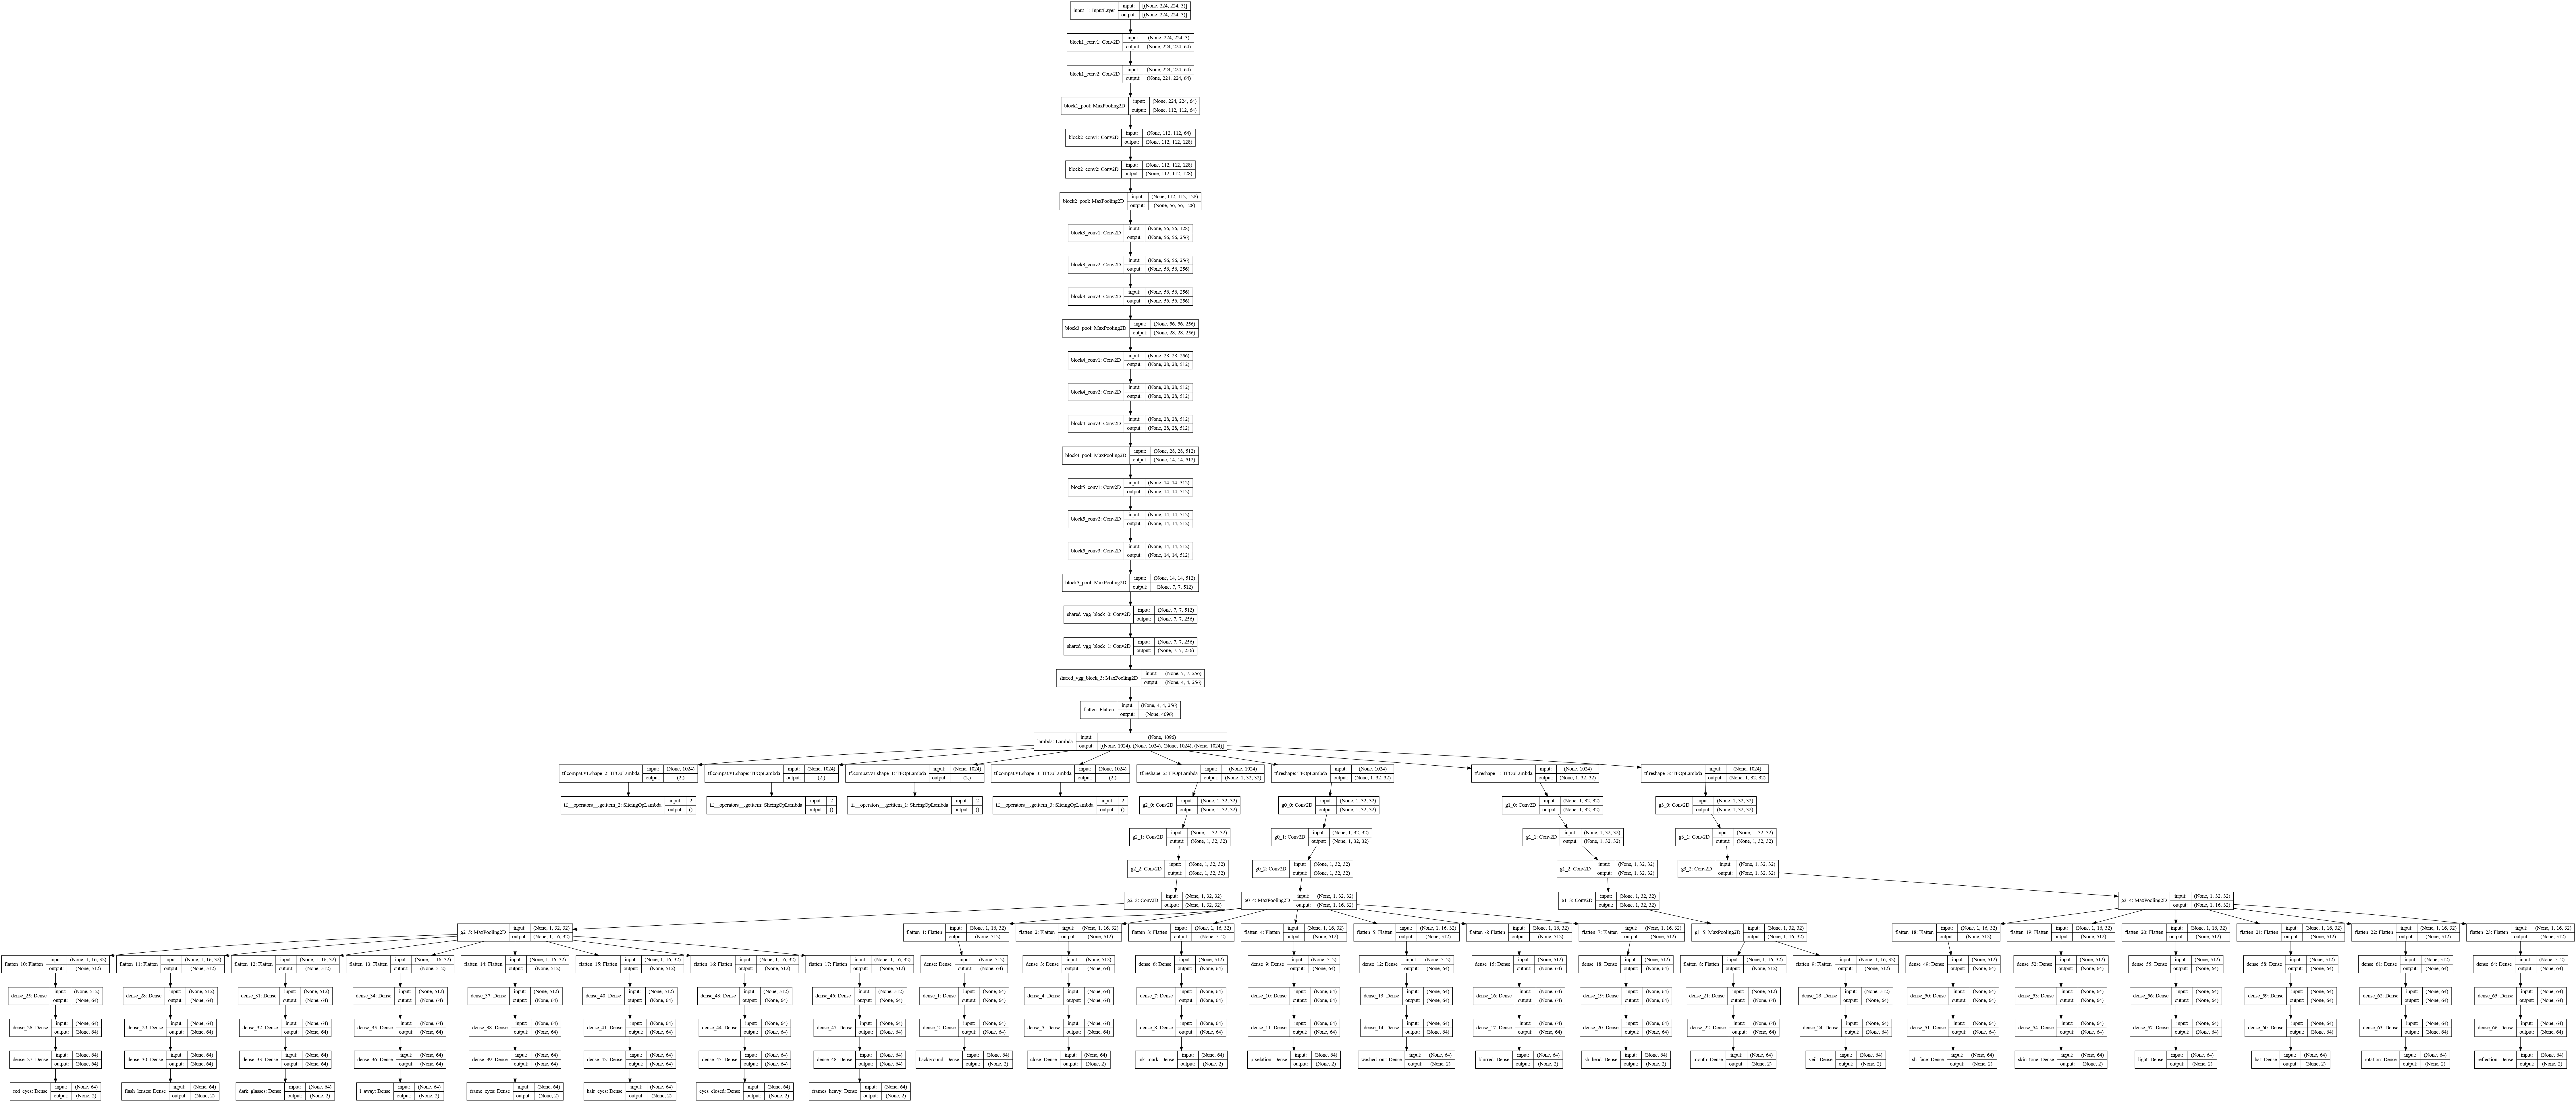

In [11]:
runner.visualize_model(outfile_path=f"figs/handcrafted_mtl_model_3.png")

In [12]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model

In [13]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 17,555,310
  .. Trainable params: 2,840,622
  .. Non-trainable params: 14,714,688
Epoch 1/200


154/154 [==============================] - 387s 2s/step - loss: 1.0306 - background_loss: 0.6829 - close_loss: 0.5672 - ink_mark_loss: 0.6206 - pixelation_loss: 0.5426 - washed_out_loss: 0.0757 - blurred_loss: 0.4343 - sh_head_loss: 0.3866 - mouth_loss: 0.0327 - veil_loss: 0.5875 - red_eyes_loss: 0.5379 - flash_lenses_loss: 0.2768 - dark_glasses_loss: 0.7121 - l_away_loss: 0.3143 - frame_eyes_loss: 0.6902 - hair_eyes_loss: 0.6453 - eyes_closed_loss: 0.3511 - frames_heavy_loss: 0.0065 - sh_face_loss: 0.6974 - skin_tone_loss: 0.0602 - light_loss: 0.2954 - hat_loss: 0.4752 - rotation_loss: 0.7382 - reflection_loss: 0.5756 - background_accuracy: 0.7271 - close_accuracy: 0.7541 - ink_mark_accuracy: 0.6802 - pixelation_accuracy: 0.7750 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.8486 - sh_head_accuracy: 0.8829 - mouth_accuracy: 0.9911 - veil_accuracy: 0.7007 - red_eyes_accuracy: 0.7875 - flash_lenses_accuracy: 0.9367 - dark_glasses_accuracy: 0.5185 - l_away_accuracy: 0.9174 - frame_e

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


146/154 [===========================>..] - ETA: 16s - loss: 0.5584 - background_loss: 0.4530 - close_loss: 0.4698 - ink_mark_loss: 0.3206 - pixelation_loss: 0.1257 - washed_out_loss: 0.0492 - blurred_loss: 0.2015 - sh_head_loss: 0.0433 - mouth_loss: 0.0130 - veil_loss: 0.2817 - red_eyes_loss: 0.3173 - flash_lenses_loss: 0.0196 - dark_glasses_loss: 0.4645 - l_away_loss: 0.1886 - frame_eyes_loss: 0.4435 - hair_eyes_loss: 0.3236 - eyes_closed_loss: 0.2534 - frames_heavy_loss: 9.5218e-07 - sh_face_loss: 0.4784 - skin_tone_loss: 0.0320 - light_loss: 0.2470 - hat_loss: 0.3097 - rotation_loss: 0.3794 - reflection_loss: 0.1689 - background_accuracy: 0.7911 - close_accuracy: 0.7635 - ink_mark_accuracy: 0.8634 - pixelation_accuracy: 0.9563 - washed_out_accuracy: 0.9889 - blurred_accuracy: 0.9249 - sh_head_accuracy: 0.9872 - mouth_accuracy: 0.9970 - veil_accuracy: 0.8707 - red_eyes_accuracy: 0.8709 - flash_lenses_accuracy: 0.9949 - dark_glasses_accuracy: 0.7701 - l_away_accuracy: 0.9298 - frame_e

Communication with Neptune restored!


154/154 [==============================] - 342s 2s/step - loss: 0.5580 - background_loss: 0.4515 - close_loss: 0.4701 - ink_mark_loss: 0.3216 - pixelation_loss: 0.1244 - washed_out_loss: 0.0478 - blurred_loss: 0.1975 - sh_head_loss: 0.0417 - mouth_loss: 0.0124 - veil_loss: 0.2794 - red_eyes_loss: 0.3186 - flash_lenses_loss: 0.0192 - dark_glasses_loss: 0.4650 - l_away_loss: 0.1895 - frame_eyes_loss: 0.4420 - hair_eyes_loss: 0.3289 - eyes_closed_loss: 0.2548 - frames_heavy_loss: 1.0333e-06 - sh_face_loss: 0.4797 - skin_tone_loss: 0.0317 - light_loss: 0.2461 - hat_loss: 0.3097 - rotation_loss: 0.3790 - reflection_loss: 0.1695 - background_accuracy: 0.7906 - close_accuracy: 0.7644 - ink_mark_accuracy: 0.8640 - pixelation_accuracy: 0.9570 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9263 - sh_head_accuracy: 0.9876 - mouth_accuracy: 0.9972 - veil_accuracy: 0.8722 - red_eyes_accuracy: 0.8697 - flash_lenses_accuracy: 0.9949 - dark_glasses_accuracy: 0.7677 - l_away_accuracy: 0.9296 - fra

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


119/154 [======================>.......] - ETA: 1:09 - loss: 0.5013 - background_loss: 0.4344 - close_loss: 0.4614 - ink_mark_loss: 0.2996 - pixelation_loss: 0.0893 - washed_out_loss: 0.0424 - blurred_loss: 0.1366 - sh_head_loss: 0.0261 - mouth_loss: 0.0111 - veil_loss: 0.2093 - red_eyes_loss: 0.2677 - flash_lenses_loss: 0.0244 - dark_glasses_loss: 0.4367 - l_away_loss: 0.1734 - frame_eyes_loss: 0.4082 - hair_eyes_loss: 0.3038 - eyes_closed_loss: 0.2481 - frames_heavy_loss: 3.3420e-07 - sh_face_loss: 0.4496 - skin_tone_loss: 0.0273 - light_loss: 0.2496 - hat_loss: 0.2442 - rotation_loss: 0.3371 - reflection_loss: 0.1321 - background_accuracy: 0.8015 - close_accuracy: 0.7639 - ink_mark_accuracy: 0.8763 - pixelation_accuracy: 0.9719 - washed_out_accuracy: 0.9900 - blurred_accuracy: 0.9546 - sh_head_accuracy: 0.9932 - mouth_accuracy: 0.9968 - veil_accuracy: 0.9136 - red_eyes_accuracy: 0.8939 - flash_lenses_accuracy: 0.9929 - dark_glasses_accuracy: 0.7849 - l_away_accuracy: 0.9372 - frame_

Communication with Neptune restored!


154/154 [==============================] - 341s 2s/step - loss: 0.4979 - background_loss: 0.4394 - close_loss: 0.4638 - ink_mark_loss: 0.2921 - pixelation_loss: 0.0861 - washed_out_loss: 0.0455 - blurred_loss: 0.1359 - sh_head_loss: 0.0251 - mouth_loss: 0.0100 - veil_loss: 0.2073 - red_eyes_loss: 0.2579 - flash_lenses_loss: 0.0201 - dark_glasses_loss: 0.4353 - l_away_loss: 0.1723 - frame_eyes_loss: 0.4157 - hair_eyes_loss: 0.2979 - eyes_closed_loss: 0.2494 - frames_heavy_loss: 2.7999e-07 - sh_face_loss: 0.4505 - skin_tone_loss: 0.0273 - light_loss: 0.2376 - hat_loss: 0.2426 - rotation_loss: 0.3353 - reflection_loss: 0.1320 - background_accuracy: 0.7989 - close_accuracy: 0.7644 - ink_mark_accuracy: 0.8793 - pixelation_accuracy: 0.9730 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9556 - sh_head_accuracy: 0.9931 - mouth_accuracy: 0.9972 - veil_accuracy: 0.9150 - red_eyes_accuracy: 0.8967 - flash_lenses_accuracy: 0.9941 - dark_glasses_accuracy: 0.7875 - l_away_accuracy: 0.9381 - fra

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Communication with Neptune restored!


154/154 [==============================] - 340s 2s/step - loss: 0.4396 - background_loss: 0.4004 - close_loss: 0.4547 - ink_mark_loss: 0.2756 - pixelation_loss: 0.0754 - washed_out_loss: 0.0484 - blurred_loss: 0.0738 - sh_head_loss: 0.0130 - mouth_loss: 0.0046 - veil_loss: 0.1577 - red_eyes_loss: 0.1936 - flash_lenses_loss: 0.0109 - dark_glasses_loss: 0.3973 - l_away_loss: 0.1523 - frame_eyes_loss: 0.3771 - hair_eyes_loss: 0.2692 - eyes_closed_loss: 0.2327 - frames_heavy_loss: 2.9951e-07 - sh_face_loss: 0.4185 - skin_tone_loss: 0.0213 - light_loss: 0.2287 - hat_loss: 0.1755 - rotation_loss: 0.3061 - reflection_loss: 0.1095 - background_accuracy: 0.8174 - close_accuracy: 0.7733 - ink_mark_accuracy: 0.8862 - pixelation_accuracy: 0.9750 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9775 - sh_head_accuracy: 0.9966 - mouth_accuracy: 0.9984 - veil_accuracy: 0.9351 - red_eyes_accuracy: 0.9188 - flash_lenses_accuracy: 0.9966 - dark_glasses_accuracy: 0.8147 - l_away_accuracy: 0.9418 - fra

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


137/154 [=========================>....] - ETA: 33s - loss: 0.4016 - background_loss: 0.2990 - close_loss: 0.4392 - ink_mark_loss: 0.2700 - pixelation_loss: 0.0694 - washed_out_loss: 0.0438 - blurred_loss: 0.0533 - sh_head_loss: 0.0120 - mouth_loss: 0.0035 - veil_loss: 0.1317 - red_eyes_loss: 0.1769 - flash_lenses_loss: 0.0088 - dark_glasses_loss: 0.3638 - l_away_loss: 0.1423 - frame_eyes_loss: 0.3638 - hair_eyes_loss: 0.2459 - eyes_closed_loss: 0.2270 - frames_heavy_loss: 5.9223e-08 - sh_face_loss: 0.3865 - skin_tone_loss: 0.0220 - light_loss: 0.2245 - hat_loss: 0.1541 - rotation_loss: 0.2835 - reflection_loss: 0.0951 - background_accuracy: 0.8898 - close_accuracy: 0.7858 - ink_mark_accuracy: 0.8859 - pixelation_accuracy: 0.9786 - washed_out_accuracy: 0.9893 - blurred_accuracy: 0.9840 - sh_head_accuracy: 0.9973 - mouth_accuracy: 0.9993 - veil_accuracy: 0.9437 - red_eyes_accuracy: 0.9297 - flash_lenses_accuracy: 0.9973 - dark_glasses_accuracy: 0.8317 - l_away_accuracy: 0.9489 - frame_e

Communication with Neptune restored!


154/154 [==============================] - 343s 2s/step - loss: 0.4027 - background_loss: 0.3015 - close_loss: 0.4434 - ink_mark_loss: 0.2685 - pixelation_loss: 0.0686 - washed_out_loss: 0.0432 - blurred_loss: 0.0521 - sh_head_loss: 0.0111 - mouth_loss: 0.0032 - veil_loss: 0.1288 - red_eyes_loss: 0.1805 - flash_lenses_loss: 0.0082 - dark_glasses_loss: 0.3689 - l_away_loss: 0.1455 - frame_eyes_loss: 0.3622 - hair_eyes_loss: 0.2496 - eyes_closed_loss: 0.2253 - frames_heavy_loss: 6.1805e-08 - sh_face_loss: 0.3920 - skin_tone_loss: 0.0210 - light_loss: 0.2244 - hat_loss: 0.1504 - rotation_loss: 0.2814 - reflection_loss: 0.0971 - background_accuracy: 0.8888 - close_accuracy: 0.7831 - ink_mark_accuracy: 0.8864 - pixelation_accuracy: 0.9791 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9848 - sh_head_accuracy: 0.9974 - mouth_accuracy: 0.9994 - veil_accuracy: 0.9458 - red_eyes_accuracy: 0.9284 - flash_lenses_accuracy: 0.9974 - dark_glasses_accuracy: 0.8287 - l_away_accuracy: 0.9481 - fra

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Communication with Neptune restored!


154/154 [==============================] - 338s 2s/step - loss: 0.3565 - background_loss: 0.2074 - close_loss: 0.4345 - ink_mark_loss: 0.2412 - pixelation_loss: 0.0477 - washed_out_loss: 0.0438 - blurred_loss: 0.0413 - sh_head_loss: 0.0105 - mouth_loss: 0.0033 - veil_loss: 0.1006 - red_eyes_loss: 0.1534 - flash_lenses_loss: 0.0066 - dark_glasses_loss: 0.3267 - l_away_loss: 0.1388 - frame_eyes_loss: 0.3441 - hair_eyes_loss: 0.2269 - eyes_closed_loss: 0.1948 - frames_heavy_loss: 9.2930e-08 - sh_face_loss: 0.3525 - skin_tone_loss: 0.0165 - light_loss: 0.2162 - hat_loss: 0.1326 - rotation_loss: 0.2523 - reflection_loss: 0.0732 - background_accuracy: 0.9261 - close_accuracy: 0.7987 - ink_mark_accuracy: 0.9008 - pixelation_accuracy: 0.9846 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9886 - sh_head_accuracy: 0.9972 - mouth_accuracy: 0.9992 - veil_accuracy: 0.9578 - red_eyes_accuracy: 0.9361 - flash_lenses_accuracy: 0.9980 - dark_glasses_accuracy: 0.8575 - l_away_accuracy: 0.9460 - fra

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


150/154 [============================>.] - ETA: 7s - loss: 0.3303 - background_loss: 0.1669 - close_loss: 0.4179 - ink_mark_loss: 0.2315 - pixelation_loss: 0.0461 - washed_out_loss: 0.0436 - blurred_loss: 0.0282 - sh_head_loss: 0.0070 - mouth_loss: 0.0023 - veil_loss: 0.0888 - red_eyes_loss: 0.1345 - flash_lenses_loss: 0.0070 - dark_glasses_loss: 0.3052 - l_away_loss: 0.1259 - frame_eyes_loss: 0.3320 - hair_eyes_loss: 0.2159 - eyes_closed_loss: 0.1778 - frames_heavy_loss: 8.1574e-08 - sh_face_loss: 0.3319 - skin_tone_loss: 0.0117 - light_loss: 0.2066 - hat_loss: 0.1115 - rotation_loss: 0.2393 - reflection_loss: 0.0710 - background_accuracy: 0.9442 - close_accuracy: 0.8117 - ink_mark_accuracy: 0.9035 - pixelation_accuracy: 0.9862 - washed_out_accuracy: 0.9890 - blurred_accuracy: 0.9925 - sh_head_accuracy: 0.9985 - mouth_accuracy: 0.9996 - veil_accuracy: 0.9642 - red_eyes_accuracy: 0.9467 - flash_lenses_accuracy: 0.9983 - dark_glasses_accuracy: 0.8706 - l_away_accuracy: 0.9565 - frame_ey

Communication with Neptune restored!


154/154 [==============================] - 339s 2s/step - loss: 0.3301 - background_loss: 0.1658 - close_loss: 0.4173 - ink_mark_loss: 0.2310 - pixelation_loss: 0.0453 - washed_out_loss: 0.0427 - blurred_loss: 0.0278 - sh_head_loss: 0.0069 - mouth_loss: 0.0023 - veil_loss: 0.0898 - red_eyes_loss: 0.1373 - flash_lenses_loss: 0.0068 - dark_glasses_loss: 0.3050 - l_away_loss: 0.1249 - frame_eyes_loss: 0.3301 - hair_eyes_loss: 0.2158 - eyes_closed_loss: 0.1782 - frames_heavy_loss: 8.6954e-08 - sh_face_loss: 0.3305 - skin_tone_loss: 0.0129 - light_loss: 0.2068 - hat_loss: 0.1121 - rotation_loss: 0.2413 - reflection_loss: 0.0702 - background_accuracy: 0.9446 - close_accuracy: 0.8127 - ink_mark_accuracy: 0.9034 - pixelation_accuracy: 0.9864 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9925 - sh_head_accuracy: 0.9986 - mouth_accuracy: 0.9996 - veil_accuracy: 0.9639 - red_eyes_accuracy: 0.9454 - flash_lenses_accuracy: 0.9984 - dark_glasses_accuracy: 0.8707 - l_away_accuracy: 0.9568 - fra

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 20/154 [==>...........................] - ETA: 4:38 - loss: 0.2856 - background_loss: 0.1368 - close_loss: 0.3497 - ink_mark_loss: 0.2315 - pixelation_loss: 0.0289 - washed_out_loss: 0.0410 - blurred_loss: 0.0178 - sh_head_loss: 0.0176 - mouth_loss: 2.3613e-04 - veil_loss: 0.0622 - red_eyes_loss: 0.1228 - flash_lenses_loss: 0.0019 - dark_glasses_loss: 0.2402 - l_away_loss: 0.1235 - frame_eyes_loss: 0.3221 - hair_eyes_loss: 0.1827 - eyes_closed_loss: 0.1415 - frames_heavy_loss: 9.3132e-10 - sh_face_loss: 0.2768 - skin_tone_loss: 0.0101 - light_loss: 0.1793 - hat_loss: 0.0963 - rotation_loss: 0.1913 - reflection_loss: 0.0819 - background_accuracy: 0.9625 - close_accuracy: 0.8531 - ink_mark_accuracy: 0.9016 - pixelation_accuracy: 0.9922 - washed_out_accuracy: 0.9906 - blurred_accuracy: 0.9922 - sh_head_accuracy: 0.9953 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9781 - red_eyes_accuracy: 0.9547 - flash_lenses_accuracy: 0.9984 - dark_glasses_accuracy: 0.8984 - l_away_accuracy: 0.9641 - fr

Communication with Neptune restored!


154/154 [==============================] - 339s 2s/step - loss: 0.2918 - background_loss: 0.1246 - close_loss: 0.3542 - ink_mark_loss: 0.2046 - pixelation_loss: 0.0328 - washed_out_loss: 0.0422 - blurred_loss: 0.0283 - sh_head_loss: 0.0052 - mouth_loss: 0.0014 - veil_loss: 0.0694 - red_eyes_loss: 0.1084 - flash_lenses_loss: 0.0068 - dark_glasses_loss: 0.2795 - l_away_loss: 0.1182 - frame_eyes_loss: 0.3064 - hair_eyes_loss: 0.1883 - eyes_closed_loss: 0.1553 - frames_heavy_loss: 3.5099e-08 - sh_face_loss: 0.3109 - skin_tone_loss: 0.0116 - light_loss: 0.1869 - hat_loss: 0.1023 - rotation_loss: 0.2224 - reflection_loss: 0.0583 - background_accuracy: 0.9612 - close_accuracy: 0.8525 - ink_mark_accuracy: 0.9188 - pixelation_accuracy: 0.9903 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9909 - sh_head_accuracy: 0.9986 - mouth_accuracy: 0.9996 - veil_accuracy: 0.9704 - red_eyes_accuracy: 0.9554 - flash_lenses_accuracy: 0.9978 - dark_glasses_accuracy: 0.8797 - l_away_accuracy: 0.9584 - fra

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


Epoch 36/200
  1/154 [..............................] - ETA: 5:04 - loss: 0.2190 - background_loss: 0.0346 - close_loss: 0.2444 - ink_mark_loss: 0.1119 - pixelation_loss: 0.0042 - washed_out_loss: 0.0064 - blurred_loss: 0.0017 - sh_head_loss: 9.9525e-05 - mouth_loss: 1.3417e-04 - veil_loss: 0.0444 - red_eyes_loss: 0.1208 - flash_lenses_loss: 1.9133e-04 - dark_glasses_loss: 0.1223 - l_away_loss: 0.2252 - frame_eyes_loss: 0.1911 - hair_eyes_loss: 0.1069 - eyes_closed_loss: 0.0766 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.2443 - skin_tone_loss: 1.2752e-04 - light_loss: 0.1866 - hat_loss: 0.0459 - rotation_loss: 0.2722 - reflection_loss: 0.1497 - background_accuracy: 1.0000 - close_accuracy: 0.9375 - ink_mark_accuracy: 0.9688 - pixelation_accuracy: 1.0000 - washed_out_accuracy: 1.0000 - blurred_accuracy: 1.0000 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 1.0000 - red_eyes_accuracy: 0.9375 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9688 - l_a

Communication with Neptune restored!


154/154 [==============================] - 340s 2s/step - loss: 0.2683 - background_loss: 0.0971 - close_loss: 0.3257 - ink_mark_loss: 0.1831 - pixelation_loss: 0.0337 - washed_out_loss: 0.0406 - blurred_loss: 0.0207 - sh_head_loss: 0.0041 - mouth_loss: 0.0035 - veil_loss: 0.0684 - red_eyes_loss: 0.1045 - flash_lenses_loss: 0.0046 - dark_glasses_loss: 0.2604 - l_away_loss: 0.1067 - frame_eyes_loss: 0.2920 - hair_eyes_loss: 0.1696 - eyes_closed_loss: 0.1383 - frames_heavy_loss: 9.9421e-09 - sh_face_loss: 0.2833 - skin_tone_loss: 0.0116 - light_loss: 0.1867 - hat_loss: 0.0832 - rotation_loss: 0.2143 - reflection_loss: 0.0502 - background_accuracy: 0.9706 - close_accuracy: 0.8709 - ink_mark_accuracy: 0.9261 - pixelation_accuracy: 0.9886 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9947 - sh_head_accuracy: 0.9982 - mouth_accuracy: 0.9996 - veil_accuracy: 0.9702 - red_eyes_accuracy: 0.9588 - flash_lenses_accuracy: 0.9984 - dark_glasses_accuracy: 0.8937 - l_away_accuracy: 0.9600 - fra

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 33/154 [=====>........................] - ETA: 4:05 - loss: 0.2403 - background_loss: 0.0659 - close_loss: 0.2824 - ink_mark_loss: 0.1947 - pixelation_loss: 0.0198 - washed_out_loss: 0.0396 - blurred_loss: 0.0196 - sh_head_loss: 0.0107 - mouth_loss: 0.0030 - veil_loss: 0.0432 - red_eyes_loss: 0.0654 - flash_lenses_loss: 5.5499e-04 - dark_glasses_loss: 0.2278 - l_away_loss: 0.0854 - frame_eyes_loss: 0.2967 - hair_eyes_loss: 0.1560 - eyes_closed_loss: 0.1262 - frames_heavy_loss: 1.0160e-09 - sh_face_loss: 0.2745 - skin_tone_loss: 0.0019 - light_loss: 0.1744 - hat_loss: 0.0920 - rotation_loss: 0.1750 - reflection_loss: 0.0481 - background_accuracy: 0.9858 - close_accuracy: 0.8987 - ink_mark_accuracy: 0.9167 - pixelation_accuracy: 0.9962 - washed_out_accuracy: 0.9886 - blurred_accuracy: 0.9934 - sh_head_accuracy: 0.9972 - mouth_accuracy: 0.9991 - veil_accuracy: 0.9830 - red_eyes_accuracy: 0.9735 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9015 - l_away_accuracy: 0.9640 - fr

Communication with Neptune restored!


154/154 [==============================] - 345s 2s/step - loss: 0.2456 - background_loss: 0.0854 - close_loss: 0.2932 - ink_mark_loss: 0.1741 - pixelation_loss: 0.0253 - washed_out_loss: 0.0382 - blurred_loss: 0.0188 - sh_head_loss: 0.0055 - mouth_loss: 0.0014 - veil_loss: 0.0598 - red_eyes_loss: 0.0806 - flash_lenses_loss: 0.0037 - dark_glasses_loss: 0.2296 - l_away_loss: 0.0922 - frame_eyes_loss: 0.2857 - hair_eyes_loss: 0.1600 - eyes_closed_loss: 0.1255 - frames_heavy_loss: 2.1771e-09 - sh_face_loss: 0.2700 - skin_tone_loss: 0.0083 - light_loss: 0.1708 - hat_loss: 0.0775 - rotation_loss: 0.2042 - reflection_loss: 0.0463 - background_accuracy: 0.9773 - close_accuracy: 0.8904 - ink_mark_accuracy: 0.9282 - pixelation_accuracy: 0.9923 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9945 - sh_head_accuracy: 0.9980 - mouth_accuracy: 0.9996 - veil_accuracy: 0.9744 - red_eyes_accuracy: 0.9683 - flash_lenses_accuracy: 0.9990 - dark_glasses_accuracy: 0.9075 - l_away_accuracy: 0.9649 - fra

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 10/154 [>.............................] - ETA: 4:38 - loss: 0.2282 - background_loss: 0.0614 - close_loss: 0.2520 - ink_mark_loss: 0.2029 - pixelation_loss: 0.0554 - washed_out_loss: 0.0579 - blurred_loss: 0.0107 - sh_head_loss: 0.0018 - mouth_loss: 4.9266e-04 - veil_loss: 0.0519 - red_eyes_loss: 0.0982 - flash_lenses_loss: 0.0026 - dark_glasses_loss: 0.2064 - l_away_loss: 0.0875 - frame_eyes_loss: 0.2751 - hair_eyes_loss: 0.1040 - eyes_closed_loss: 0.0978 - frames_heavy_loss: 3.7253e-10 - sh_face_loss: 0.2342 - skin_tone_loss: 0.0019 - light_loss: 0.1997 - hat_loss: 0.0368 - rotation_loss: 0.2108 - reflection_loss: 0.0326 - background_accuracy: 0.9781 - close_accuracy: 0.8906 - ink_mark_accuracy: 0.9375 - pixelation_accuracy: 0.9844 - washed_out_accuracy: 0.9844 - blurred_accuracy: 0.9937 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9750 - red_eyes_accuracy: 0.9656 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9156 - l_away_accuracy: 0.9719 - fr

Communication with Neptune restored!


154/154 [==============================] - 341s 2s/step - loss: 0.2284 - background_loss: 0.0838 - close_loss: 0.2720 - ink_mark_loss: 0.1641 - pixelation_loss: 0.0293 - washed_out_loss: 0.0360 - blurred_loss: 0.0180 - sh_head_loss: 0.0045 - mouth_loss: 0.0017 - veil_loss: 0.0525 - red_eyes_loss: 0.0786 - flash_lenses_loss: 0.0021 - dark_glasses_loss: 0.2087 - l_away_loss: 0.0878 - frame_eyes_loss: 0.2472 - hair_eyes_loss: 0.1462 - eyes_closed_loss: 0.1167 - frames_heavy_loss: 2.0754e-08 - sh_face_loss: 0.2530 - skin_tone_loss: 0.0068 - light_loss: 0.1671 - hat_loss: 0.0725 - rotation_loss: 0.1970 - reflection_loss: 0.0385 - background_accuracy: 0.9746 - close_accuracy: 0.9008 - ink_mark_accuracy: 0.9353 - pixelation_accuracy: 0.9911 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9945 - sh_head_accuracy: 0.9988 - mouth_accuracy: 0.9994 - veil_accuracy: 0.9789 - red_eyes_accuracy: 0.9675 - flash_lenses_accuracy: 0.9990 - dark_glasses_accuracy: 0.9121 - l_away_accuracy: 0.9669 - fra

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 45/154 [=======>......................] - ETA: 3:33 - loss: 0.2053 - background_loss: 0.0432 - close_loss: 0.2509 - ink_mark_loss: 0.1220 - pixelation_loss: 0.0433 - washed_out_loss: 0.0307 - blurred_loss: 0.0098 - sh_head_loss: 0.0073 - mouth_loss: 1.6769e-04 - veil_loss: 0.0499 - red_eyes_loss: 0.0713 - flash_lenses_loss: 4.0165e-04 - dark_glasses_loss: 0.1937 - l_away_loss: 0.0740 - frame_eyes_loss: 0.2404 - hair_eyes_loss: 0.1317 - eyes_closed_loss: 0.1122 - frames_heavy_loss: 2.4835e-10 - sh_face_loss: 0.2055 - skin_tone_loss: 0.0035 - light_loss: 0.1680 - hat_loss: 0.0545 - rotation_loss: 0.1908 - reflection_loss: 0.0500 - background_accuracy: 0.9847 - close_accuracy: 0.9000 - ink_mark_accuracy: 0.9563 - pixelation_accuracy: 0.9854 - washed_out_accuracy: 0.9910 - blurred_accuracy: 0.9972 - sh_head_accuracy: 0.9986 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9806 - red_eyes_accuracy: 0.9722 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9264 - l_away_accuracy: 0.9743 

Communication with Neptune restored!


154/154 [==============================] - 337s 2s/step - loss: 0.2060 - background_loss: 0.0493 - close_loss: 0.2385 - ink_mark_loss: 0.1244 - pixelation_loss: 0.0298 - washed_out_loss: 0.0351 - blurred_loss: 0.0077 - sh_head_loss: 0.0050 - mouth_loss: 9.4733e-04 - veil_loss: 0.0450 - red_eyes_loss: 0.0679 - flash_lenses_loss: 0.0011 - dark_glasses_loss: 0.2090 - l_away_loss: 0.0804 - frame_eyes_loss: 0.2396 - hair_eyes_loss: 0.1293 - eyes_closed_loss: 0.1133 - frames_heavy_loss: 7.7409e-10 - sh_face_loss: 0.2304 - skin_tone_loss: 0.0045 - light_loss: 0.1611 - hat_loss: 0.0590 - rotation_loss: 0.1883 - reflection_loss: 0.0400 - background_accuracy: 0.9830 - close_accuracy: 0.9123 - ink_mark_accuracy: 0.9525 - pixelation_accuracy: 0.9907 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9982 - sh_head_accuracy: 0.9990 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9813 - red_eyes_accuracy: 0.9716 - flash_lenses_accuracy: 0.9996 - dark_glasses_accuracy: 0.9150 - l_away_accuracy: 0.9696 -

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 28/154 [====>.........................] - ETA: 4:05 - loss: 0.1875 - background_loss: 0.0406 - close_loss: 0.1563 - ink_mark_loss: 0.1090 - pixelation_loss: 0.0270 - washed_out_loss: 0.0346 - blurred_loss: 0.0195 - sh_head_loss: 0.0062 - mouth_loss: 0.0021 - veil_loss: 0.0483 - red_eyes_loss: 0.0517 - flash_lenses_loss: 0.0066 - dark_glasses_loss: 0.2033 - l_away_loss: 0.0638 - frame_eyes_loss: 0.2087 - hair_eyes_loss: 0.0960 - eyes_closed_loss: 0.0823 - frames_heavy_loss: 6.6523e-10 - sh_face_loss: 0.2521 - skin_tone_loss: 0.0062 - light_loss: 0.1645 - hat_loss: 0.0621 - rotation_loss: 0.1934 - reflection_loss: 0.0410 - background_accuracy: 0.9888 - close_accuracy: 0.9453 - ink_mark_accuracy: 0.9542 - pixelation_accuracy: 0.9922 - washed_out_accuracy: 0.9888 - blurred_accuracy: 0.9933 - sh_head_accuracy: 0.9955 - mouth_accuracy: 0.9989 - veil_accuracy: 0.9833 - red_eyes_accuracy: 0.9754 - flash_lenses_accuracy: 0.9989 - dark_glasses_accuracy: 0.9196 - l_away_accuracy: 0.9754 - frame_

Communication with Neptune restored!


154/154 [==============================] - 339s 2s/step - loss: 0.1979 - background_loss: 0.0502 - close_loss: 0.2272 - ink_mark_loss: 0.1317 - pixelation_loss: 0.0261 - washed_out_loss: 0.0330 - blurred_loss: 0.0146 - sh_head_loss: 0.0032 - mouth_loss: 0.0012 - veil_loss: 0.0460 - red_eyes_loss: 0.0546 - flash_lenses_loss: 0.0029 - dark_glasses_loss: 0.1946 - l_away_loss: 0.0762 - frame_eyes_loss: 0.2253 - hair_eyes_loss: 0.1133 - eyes_closed_loss: 0.1028 - frames_heavy_loss: 5.5637e-10 - sh_face_loss: 0.2220 - skin_tone_loss: 0.0083 - light_loss: 0.1538 - hat_loss: 0.0666 - rotation_loss: 0.1849 - reflection_loss: 0.0409 - background_accuracy: 0.9844 - close_accuracy: 0.9140 - ink_mark_accuracy: 0.9497 - pixelation_accuracy: 0.9901 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9961 - sh_head_accuracy: 0.9986 - mouth_accuracy: 0.9996 - veil_accuracy: 0.9858 - red_eyes_accuracy: 0.9769 - flash_lenses_accuracy: 0.9994 - dark_glasses_accuracy: 0.9209 - l_away_accuracy: 0.9702 - fra

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


112/154 [====================>.........] - ETA: 1:24 - loss: 0.1608 - background_loss: 0.0389 - close_loss: 0.1887 - ink_mark_loss: 0.0916 - pixelation_loss: 0.0118 - washed_out_loss: 0.0301 - blurred_loss: 0.0189 - sh_head_loss: 0.0053 - mouth_loss: 8.4753e-04 - veil_loss: 0.0281 - red_eyes_loss: 0.0420 - flash_lenses_loss: 6.5789e-04 - dark_glasses_loss: 0.1649 - l_away_loss: 0.0582 - frame_eyes_loss: 0.1883 - hair_eyes_loss: 0.0969 - eyes_closed_loss: 0.0783 - frames_heavy_loss: 3.3262e-11 - sh_face_loss: 0.1820 - skin_tone_loss: 0.0052 - light_loss: 0.1427 - hat_loss: 0.0469 - rotation_loss: 0.1547 - reflection_loss: 0.0329 - background_accuracy: 0.9866 - close_accuracy: 0.9263 - ink_mark_accuracy: 0.9654 - pixelation_accuracy: 0.9958 - washed_out_accuracy: 0.9891 - blurred_accuracy: 0.9947 - sh_head_accuracy: 0.9983 - mouth_accuracy: 0.9994 - veil_accuracy: 0.9902 - red_eyes_accuracy: 0.9824 - flash_lenses_accuracy: 0.9997 - dark_glasses_accuracy: 0.9339 - l_away_accuracy: 0.9796 

Communication with Neptune restored!


154/154 [==============================] - 342s 2s/step - loss: 0.1603 - background_loss: 0.0381 - close_loss: 0.1817 - ink_mark_loss: 0.0892 - pixelation_loss: 0.0138 - washed_out_loss: 0.0294 - blurred_loss: 0.0164 - sh_head_loss: 0.0044 - mouth_loss: 0.0020 - veil_loss: 0.0315 - red_eyes_loss: 0.0466 - flash_lenses_loss: 6.9913e-04 - dark_glasses_loss: 0.1631 - l_away_loss: 0.0610 - frame_eyes_loss: 0.1920 - hair_eyes_loss: 0.0958 - eyes_closed_loss: 0.0817 - frames_heavy_loss: 2.4190e-11 - sh_face_loss: 0.1803 - skin_tone_loss: 0.0048 - light_loss: 0.1392 - hat_loss: 0.0459 - rotation_loss: 0.1564 - reflection_loss: 0.0295 - background_accuracy: 0.9872 - close_accuracy: 0.9306 - ink_mark_accuracy: 0.9657 - pixelation_accuracy: 0.9959 - washed_out_accuracy: 0.9897 - blurred_accuracy: 0.9957 - sh_head_accuracy: 0.9986 - mouth_accuracy: 0.9994 - veil_accuracy: 0.9897 - red_eyes_accuracy: 0.9821 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9347 - l_away_accuracy: 0.9775 -

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 90/154 [================>.............] - ETA: 2:10 - loss: 0.1405 - background_loss: 0.0328 - close_loss: 0.1631 - ink_mark_loss: 0.0685 - pixelation_loss: 0.0140 - washed_out_loss: 0.0263 - blurred_loss: 0.0122 - sh_head_loss: 6.5279e-04 - mouth_loss: 7.6046e-04 - veil_loss: 0.0279 - red_eyes_loss: 0.0384 - flash_lenses_loss: 0.0019 - dark_glasses_loss: 0.1438 - l_away_loss: 0.0438 - frame_eyes_loss: 0.1685 - hair_eyes_loss: 0.0741 - eyes_closed_loss: 0.0709 - frames_heavy_loss: 4.1392e-11 - sh_face_loss: 0.1566 - skin_tone_loss: 0.0052 - light_loss: 0.1423 - hat_loss: 0.0399 - rotation_loss: 0.1562 - reflection_loss: 0.0168 - background_accuracy: 0.9917 - close_accuracy: 0.9389 - ink_mark_accuracy: 0.9740 - pixelation_accuracy: 0.9944 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9972 - sh_head_accuracy: 1.0000 - mouth_accuracy: 0.9997 - veil_accuracy: 0.9906 - red_eyes_accuracy: 0.9851 - flash_lenses_accuracy: 0.9993 - dark_glasses_accuracy: 0.9413 - l_away_accuracy: 0.9840 

Communication with Neptune restored!


154/154 [==============================] - 344s 2s/step - loss: 0.1440 - background_loss: 0.0401 - close_loss: 0.1682 - ink_mark_loss: 0.0770 - pixelation_loss: 0.0167 - washed_out_loss: 0.0255 - blurred_loss: 0.0113 - sh_head_loss: 0.0015 - mouth_loss: 0.0012 - veil_loss: 0.0302 - red_eyes_loss: 0.0407 - flash_lenses_loss: 0.0017 - dark_glasses_loss: 0.1408 - l_away_loss: 0.0511 - frame_eyes_loss: 0.1685 - hair_eyes_loss: 0.0843 - eyes_closed_loss: 0.0681 - frames_heavy_loss: 1.4514e-10 - sh_face_loss: 0.1609 - skin_tone_loss: 0.0057 - light_loss: 0.1379 - hat_loss: 0.0376 - rotation_loss: 0.1510 - reflection_loss: 0.0204 - background_accuracy: 0.9888 - close_accuracy: 0.9391 - ink_mark_accuracy: 0.9708 - pixelation_accuracy: 0.9941 - washed_out_accuracy: 0.9899 - blurred_accuracy: 0.9970 - sh_head_accuracy: 0.9996 - mouth_accuracy: 0.9996 - veil_accuracy: 0.9892 - red_eyes_accuracy: 0.9860 - flash_lenses_accuracy: 0.9994 - dark_glasses_accuracy: 0.9426 - l_away_accuracy: 0.9815 - fra

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


126/154 [=======================>......] - ETA: 56s - loss: 0.1332 - background_loss: 0.0294 - close_loss: 0.1460 - ink_mark_loss: 0.0712 - pixelation_loss: 0.0197 - washed_out_loss: 0.0248 - blurred_loss: 0.0132 - sh_head_loss: 0.0018 - mouth_loss: 7.2440e-04 - veil_loss: 0.0278 - red_eyes_loss: 0.0431 - flash_lenses_loss: 0.0078 - dark_glasses_loss: 0.1245 - l_away_loss: 0.0484 - frame_eyes_loss: 0.1601 - hair_eyes_loss: 0.0687 - eyes_closed_loss: 0.0637 - frames_heavy_loss: 5.9132e-11 - sh_face_loss: 0.1530 - skin_tone_loss: 0.0035 - light_loss: 0.1309 - hat_loss: 0.0330 - rotation_loss: 0.1413 - reflection_loss: 0.0195 - background_accuracy: 0.9908 - close_accuracy: 0.9432 - ink_mark_accuracy: 0.9715 - pixelation_accuracy: 0.9943 - washed_out_accuracy: 0.9898 - blurred_accuracy: 0.9978 - sh_head_accuracy: 0.9995 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9908 - red_eyes_accuracy: 0.9844 - flash_lenses_accuracy: 0.9978 - dark_glasses_accuracy: 0.9529 - l_away_accuracy: 0.9812 - fra

Communication with Neptune restored!


154/154 [==============================] - 342s 2s/step - loss: 0.1341 - background_loss: 0.0283 - close_loss: 0.1459 - ink_mark_loss: 0.0725 - pixelation_loss: 0.0190 - washed_out_loss: 0.0249 - blurred_loss: 0.0114 - sh_head_loss: 0.0016 - mouth_loss: 6.5249e-04 - veil_loss: 0.0270 - red_eyes_loss: 0.0426 - flash_lenses_loss: 0.0065 - dark_glasses_loss: 0.1260 - l_away_loss: 0.0532 - frame_eyes_loss: 0.1575 - hair_eyes_loss: 0.0757 - eyes_closed_loss: 0.0659 - frames_heavy_loss: 4.8380e-11 - sh_face_loss: 0.1548 - skin_tone_loss: 0.0037 - light_loss: 0.1336 - hat_loss: 0.0320 - rotation_loss: 0.1393 - reflection_loss: 0.0190 - background_accuracy: 0.9917 - close_accuracy: 0.9412 - ink_mark_accuracy: 0.9716 - pixelation_accuracy: 0.9943 - washed_out_accuracy: 0.9901 - blurred_accuracy: 0.9980 - sh_head_accuracy: 0.9996 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9903 - red_eyes_accuracy: 0.9842 - flash_lenses_accuracy: 0.9982 - dark_glasses_accuracy: 0.9517 - l_away_accuracy: 0.9803 -

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


101/154 [==================>...........] - ETA: 1:46 - loss: 0.1282 - background_loss: 0.0287 - close_loss: 0.1386 - ink_mark_loss: 0.0724 - pixelation_loss: 0.0145 - washed_out_loss: 0.0204 - blurred_loss: 0.0100 - sh_head_loss: 0.0029 - mouth_loss: 9.4418e-05 - veil_loss: 0.0245 - red_eyes_loss: 0.0312 - flash_lenses_loss: 0.0013 - dark_glasses_loss: 0.1329 - l_away_loss: 0.0494 - frame_eyes_loss: 0.1454 - hair_eyes_loss: 0.0656 - eyes_closed_loss: 0.0638 - frames_heavy_loss: 3.6884e-11 - sh_face_loss: 0.1504 - skin_tone_loss: 0.0043 - light_loss: 0.1311 - hat_loss: 0.0411 - rotation_loss: 0.1218 - reflection_loss: 0.0319 - background_accuracy: 0.9929 - close_accuracy: 0.9471 - ink_mark_accuracy: 0.9728 - pixelation_accuracy: 0.9944 - washed_out_accuracy: 0.9916 - blurred_accuracy: 0.9954 - sh_head_accuracy: 0.9988 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9913 - red_eyes_accuracy: 0.9889 - flash_lenses_accuracy: 0.9997 - dark_glasses_accuracy: 0.9505 - l_away_accuracy: 0.9821 - fr

Communication with Neptune restored!


154/154 [==============================] - 343s 2s/step - loss: 0.1294 - background_loss: 0.0308 - close_loss: 0.1412 - ink_mark_loss: 0.0722 - pixelation_loss: 0.0164 - washed_out_loss: 0.0238 - blurred_loss: 0.0099 - sh_head_loss: 0.0039 - mouth_loss: 0.0013 - veil_loss: 0.0240 - red_eyes_loss: 0.0342 - flash_lenses_loss: 0.0017 - dark_glasses_loss: 0.1300 - l_away_loss: 0.0467 - frame_eyes_loss: 0.1445 - hair_eyes_loss: 0.0701 - eyes_closed_loss: 0.0616 - frames_heavy_loss: 2.4190e-11 - sh_face_loss: 0.1506 - skin_tone_loss: 0.0034 - light_loss: 0.1321 - hat_loss: 0.0372 - rotation_loss: 0.1297 - reflection_loss: 0.0283 - background_accuracy: 0.9915 - close_accuracy: 0.9448 - ink_mark_accuracy: 0.9726 - pixelation_accuracy: 0.9941 - washed_out_accuracy: 0.9909 - blurred_accuracy: 0.9955 - sh_head_accuracy: 0.9988 - mouth_accuracy: 0.9996 - veil_accuracy: 0.9907 - red_eyes_accuracy: 0.9872 - flash_lenses_accuracy: 0.9996 - dark_glasses_accuracy: 0.9478 - l_away_accuracy: 0.9830 - fra

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


137/154 [=========================>....] - ETA: 34s - loss: 0.1154 - background_loss: 0.0275 - close_loss: 0.1143 - ink_mark_loss: 0.0615 - pixelation_loss: 0.0109 - washed_out_loss: 0.0183 - blurred_loss: 0.0031 - sh_head_loss: 5.4309e-04 - mouth_loss: 0.0017 - veil_loss: 0.0161 - red_eyes_loss: 0.0305 - flash_lenses_loss: 0.0042 - dark_glasses_loss: 0.1125 - l_away_loss: 0.0466 - frame_eyes_loss: 0.1285 - hair_eyes_loss: 0.0666 - eyes_closed_loss: 0.0584 - frames_heavy_loss: 2.7192e-11 - sh_face_loss: 0.1366 - skin_tone_loss: 0.0051 - light_loss: 0.1275 - hat_loss: 0.0335 - rotation_loss: 0.1255 - reflection_loss: 0.0243 - background_accuracy: 0.9916 - close_accuracy: 0.9532 - ink_mark_accuracy: 0.9740 - pixelation_accuracy: 0.9964 - washed_out_accuracy: 0.9922 - blurred_accuracy: 0.9991 - sh_head_accuracy: 0.9998 - mouth_accuracy: 0.9993 - veil_accuracy: 0.9929 - red_eyes_accuracy: 0.9888 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9569 - l_away_accuracy: 0.9829 - fra

Communication with Neptune restored!


154/154 [==============================] - 340s 2s/step - loss: 0.1153 - background_loss: 0.0260 - close_loss: 0.1142 - ink_mark_loss: 0.0619 - pixelation_loss: 0.0108 - washed_out_loss: 0.0189 - blurred_loss: 0.0031 - sh_head_loss: 4.9346e-04 - mouth_loss: 0.0016 - veil_loss: 0.0203 - red_eyes_loss: 0.0307 - flash_lenses_loss: 0.0037 - dark_glasses_loss: 0.1100 - l_away_loss: 0.0474 - frame_eyes_loss: 0.1278 - hair_eyes_loss: 0.0683 - eyes_closed_loss: 0.0586 - frames_heavy_loss: 2.4190e-11 - sh_face_loss: 0.1351 - skin_tone_loss: 0.0053 - light_loss: 0.1247 - hat_loss: 0.0335 - rotation_loss: 0.1265 - reflection_loss: 0.0238 - background_accuracy: 0.9923 - close_accuracy: 0.9531 - ink_mark_accuracy: 0.9742 - pixelation_accuracy: 0.9963 - washed_out_accuracy: 0.9915 - blurred_accuracy: 0.9990 - sh_head_accuracy: 0.9998 - mouth_accuracy: 0.9994 - veil_accuracy: 0.9917 - red_eyes_accuracy: 0.9890 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9580 - l_away_accuracy: 0.9823 -

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


120/154 [======================>.......] - ETA: 1:07 - loss: 0.1089 - background_loss: 0.0245 - close_loss: 0.1077 - ink_mark_loss: 0.0481 - pixelation_loss: 0.0137 - washed_out_loss: 0.0178 - blurred_loss: 0.0071 - sh_head_loss: 9.7878e-04 - mouth_loss: 2.5420e-04 - veil_loss: 0.0267 - red_eyes_loss: 0.0280 - flash_lenses_loss: 0.0019 - dark_glasses_loss: 0.1017 - l_away_loss: 0.0410 - frame_eyes_loss: 0.1230 - hair_eyes_loss: 0.0626 - eyes_closed_loss: 0.0653 - frames_heavy_loss: 9.3132e-11 - sh_face_loss: 0.1210 - skin_tone_loss: 0.0030 - light_loss: 0.1220 - hat_loss: 0.0331 - rotation_loss: 0.1180 - reflection_loss: 0.0215 - background_accuracy: 0.9924 - close_accuracy: 0.9568 - ink_mark_accuracy: 0.9828 - pixelation_accuracy: 0.9961 - washed_out_accuracy: 0.9924 - blurred_accuracy: 0.9979 - sh_head_accuracy: 0.9997 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9919 - red_eyes_accuracy: 0.9893 - flash_lenses_accuracy: 0.9992 - dark_glasses_accuracy: 0.9596 - l_away_accuracy: 0.9846 

Communication with Neptune restored!


154/154 [==============================] - 337s 2s/step - loss: 0.1117 - background_loss: 0.0272 - close_loss: 0.1064 - ink_mark_loss: 0.0559 - pixelation_loss: 0.0131 - washed_out_loss: 0.0178 - blurred_loss: 0.0075 - sh_head_loss: 0.0017 - mouth_loss: 2.5024e-04 - veil_loss: 0.0245 - red_eyes_loss: 0.0310 - flash_lenses_loss: 0.0017 - dark_glasses_loss: 0.1049 - l_away_loss: 0.0453 - frame_eyes_loss: 0.1286 - hair_eyes_loss: 0.0639 - eyes_closed_loss: 0.0662 - frames_heavy_loss: 7.2571e-11 - sh_face_loss: 0.1230 - skin_tone_loss: 0.0025 - light_loss: 0.1222 - hat_loss: 0.0314 - rotation_loss: 0.1206 - reflection_loss: 0.0218 - background_accuracy: 0.9923 - close_accuracy: 0.9586 - ink_mark_accuracy: 0.9803 - pixelation_accuracy: 0.9957 - washed_out_accuracy: 0.9919 - blurred_accuracy: 0.9976 - sh_head_accuracy: 0.9996 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9921 - red_eyes_accuracy: 0.9882 - flash_lenses_accuracy: 0.9994 - dark_glasses_accuracy: 0.9604 - l_away_accuracy: 0.9823 -

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Communication with Neptune restored!


154/154 [==============================] - 338s 2s/step - loss: 0.1012 - background_loss: 0.0185 - close_loss: 0.0996 - ink_mark_loss: 0.0502 - pixelation_loss: 0.0128 - washed_out_loss: 0.0169 - blurred_loss: 0.0073 - sh_head_loss: 0.0031 - mouth_loss: 0.0013 - veil_loss: 0.0155 - red_eyes_loss: 0.0235 - flash_lenses_loss: 6.3579e-04 - dark_glasses_loss: 0.1056 - l_away_loss: 0.0363 - frame_eyes_loss: 0.1122 - hair_eyes_loss: 0.0537 - eyes_closed_loss: 0.0639 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.1171 - skin_tone_loss: 0.0033 - light_loss: 0.1140 - hat_loss: 0.0261 - rotation_loss: 0.1127 - reflection_loss: 0.0178 - background_accuracy: 0.9935 - close_accuracy: 0.9612 - ink_mark_accuracy: 0.9797 - pixelation_accuracy: 0.9957 - washed_out_accuracy: 0.9931 - blurred_accuracy: 0.9976 - sh_head_accuracy: 0.9992 - mouth_accuracy: 0.9996 - veil_accuracy: 0.9937 - red_eyes_accuracy: 0.9925 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9612 - l_away_accuracy: 0.9854 -

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


151/154 [============================>.] - ETA: 5s - loss: 0.0974 - background_loss: 0.0165 - close_loss: 0.0911 - ink_mark_loss: 0.0437 - pixelation_loss: 0.0110 - washed_out_loss: 0.0146 - blurred_loss: 0.0120 - sh_head_loss: 3.5679e-04 - mouth_loss: 0.0027 - veil_loss: 0.0181 - red_eyes_loss: 0.0236 - flash_lenses_loss: 0.0019 - dark_glasses_loss: 0.0921 - l_away_loss: 0.0406 - frame_eyes_loss: 0.1056 - hair_eyes_loss: 0.0551 - eyes_closed_loss: 0.0506 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.1245 - skin_tone_loss: 0.0066 - light_loss: 0.1145 - hat_loss: 0.0243 - rotation_loss: 0.1031 - reflection_loss: 0.0218 - background_accuracy: 0.9946 - close_accuracy: 0.9642 - ink_mark_accuracy: 0.9824 - pixelation_accuracy: 0.9967 - washed_out_accuracy: 0.9940 - blurred_accuracy: 0.9961 - sh_head_accuracy: 1.0000 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9936 - red_eyes_accuracy: 0.9907 - flash_lenses_accuracy: 0.9992 - dark_glasses_accuracy: 0.9609 - l_away_accuracy: 0.9853 - fram

Communication with Neptune restored!


154/154 [==============================] - 338s 2s/step - loss: 0.0979 - background_loss: 0.0163 - close_loss: 0.0917 - ink_mark_loss: 0.0438 - pixelation_loss: 0.0112 - washed_out_loss: 0.0145 - blurred_loss: 0.0118 - sh_head_loss: 3.5490e-04 - mouth_loss: 0.0026 - veil_loss: 0.0178 - red_eyes_loss: 0.0245 - flash_lenses_loss: 0.0019 - dark_glasses_loss: 0.0924 - l_away_loss: 0.0402 - frame_eyes_loss: 0.1070 - hair_eyes_loss: 0.0550 - eyes_closed_loss: 0.0519 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.1251 - skin_tone_loss: 0.0065 - light_loss: 0.1163 - hat_loss: 0.0246 - rotation_loss: 0.1023 - reflection_loss: 0.0214 - background_accuracy: 0.9947 - close_accuracy: 0.9639 - ink_mark_accuracy: 0.9825 - pixelation_accuracy: 0.9963 - washed_out_accuracy: 0.9939 - blurred_accuracy: 0.9961 - sh_head_accuracy: 1.0000 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9937 - red_eyes_accuracy: 0.9903 - flash_lenses_accuracy: 0.9992 - dark_glasses_accuracy: 0.9606 - l_away_accuracy: 0.9856 -

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 26/154 [====>.........................] - ETA: 4:17 - loss: 0.0745 - background_loss: 0.0243 - close_loss: 0.0610 - ink_mark_loss: 0.0374 - pixelation_loss: 0.0237 - washed_out_loss: 0.0037 - blurred_loss: 8.7063e-04 - sh_head_loss: 5.3800e-05 - mouth_loss: 8.2705e-05 - veil_loss: 0.0131 - red_eyes_loss: 0.0124 - flash_lenses_loss: 2.1763e-04 - dark_glasses_loss: 0.0724 - l_away_loss: 0.0265 - frame_eyes_loss: 0.0865 - hair_eyes_loss: 0.0369 - eyes_closed_loss: 0.0423 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.1009 - skin_tone_loss: 8.9005e-04 - light_loss: 0.0856 - hat_loss: 0.0250 - rotation_loss: 0.0701 - reflection_loss: 0.0210 - background_accuracy: 0.9916 - close_accuracy: 0.9736 - ink_mark_accuracy: 0.9892 - pixelation_accuracy: 0.9952 - washed_out_accuracy: 0.9988 - blurred_accuracy: 1.0000 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9952 - red_eyes_accuracy: 0.9952 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9700 - l_away_accur

Communication with Neptune restored!


154/154 [==============================] - 338s 2s/step - loss: 0.0852 - background_loss: 0.0211 - close_loss: 0.0830 - ink_mark_loss: 0.0491 - pixelation_loss: 0.0160 - washed_out_loss: 0.0156 - blurred_loss: 0.0032 - sh_head_loss: 9.0220e-04 - mouth_loss: 9.5726e-04 - veil_loss: 0.0181 - red_eyes_loss: 0.0171 - flash_lenses_loss: 0.0062 - dark_glasses_loss: 0.0803 - l_away_loss: 0.0300 - frame_eyes_loss: 0.0900 - hair_eyes_loss: 0.0475 - eyes_closed_loss: 0.0451 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0932 - skin_tone_loss: 0.0018 - light_loss: 0.1028 - hat_loss: 0.0209 - rotation_loss: 0.0911 - reflection_loss: 0.0179 - background_accuracy: 0.9935 - close_accuracy: 0.9667 - ink_mark_accuracy: 0.9811 - pixelation_accuracy: 0.9955 - washed_out_accuracy: 0.9943 - blurred_accuracy: 0.9992 - sh_head_accuracy: 0.9996 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9939 - red_eyes_accuracy: 0.9925 - flash_lenses_accuracy: 0.9990 - dark_glasses_accuracy: 0.9694 - l_away_accuracy: 0.98

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


  9/154 [>.............................] - ETA: 4:51 - loss: 0.0705 - background_loss: 0.0232 - close_loss: 0.0379 - ink_mark_loss: 0.0165 - pixelation_loss: 0.0011 - washed_out_loss: 0.0106 - blurred_loss: 0.0012 - sh_head_loss: 2.7596e-04 - mouth_loss: 9.6462e-06 - veil_loss: 0.0254 - red_eyes_loss: 0.0213 - flash_lenses_loss: 1.9130e-04 - dark_glasses_loss: 0.0856 - l_away_loss: 0.0363 - frame_eyes_loss: 0.0892 - hair_eyes_loss: 0.0562 - eyes_closed_loss: 0.0272 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0906 - skin_tone_loss: 0.0077 - light_loss: 0.1102 - hat_loss: 0.0226 - rotation_loss: 0.0398 - reflection_loss: 0.0021 - background_accuracy: 0.9896 - close_accuracy: 0.9861 - ink_mark_accuracy: 0.9965 - pixelation_accuracy: 1.0000 - washed_out_accuracy: 0.9965 - blurred_accuracy: 1.0000 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9896 - red_eyes_accuracy: 0.9896 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9653 - l_away_accuracy: 0.9

Communication with Neptune restored!


154/154 [==============================] - 339s 2s/step - loss: 0.0718 - background_loss: 0.0142 - close_loss: 0.0573 - ink_mark_loss: 0.0247 - pixelation_loss: 0.0085 - washed_out_loss: 0.0151 - blurred_loss: 0.0069 - sh_head_loss: 6.8569e-04 - mouth_loss: 6.6316e-04 - veil_loss: 0.0112 - red_eyes_loss: 0.0188 - flash_lenses_loss: 0.0018 - dark_glasses_loss: 0.0760 - l_away_loss: 0.0284 - frame_eyes_loss: 0.0858 - hair_eyes_loss: 0.0392 - eyes_closed_loss: 0.0384 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0806 - skin_tone_loss: 0.0027 - light_loss: 0.0977 - hat_loss: 0.0226 - rotation_loss: 0.0775 - reflection_loss: 0.0089 - background_accuracy: 0.9955 - close_accuracy: 0.9783 - ink_mark_accuracy: 0.9905 - pixelation_accuracy: 0.9963 - washed_out_accuracy: 0.9943 - blurred_accuracy: 0.9984 - sh_head_accuracy: 0.9996 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9955 - red_eyes_accuracy: 0.9931 - flash_lenses_accuracy: 0.9996 - dark_glasses_accuracy: 0.9708 - l_away_accuracy: 0.98

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 52/154 [=========>....................] - ETA: 3:27 - loss: 0.0747 - background_loss: 0.0183 - close_loss: 0.0781 - ink_mark_loss: 0.0369 - pixelation_loss: 0.0062 - washed_out_loss: 0.0157 - blurred_loss: 0.0039 - sh_head_loss: 1.0245e-04 - mouth_loss: 0.0011 - veil_loss: 0.0181 - red_eyes_loss: 0.0109 - flash_lenses_loss: 0.0011 - dark_glasses_loss: 0.0738 - l_away_loss: 0.0218 - frame_eyes_loss: 0.0899 - hair_eyes_loss: 0.0407 - eyes_closed_loss: 0.0430 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0831 - skin_tone_loss: 0.0022 - light_loss: 0.0952 - hat_loss: 0.0198 - rotation_loss: 0.0758 - reflection_loss: 0.0113 - background_accuracy: 0.9952 - close_accuracy: 0.9772 - ink_mark_accuracy: 0.9886 - pixelation_accuracy: 0.9976 - washed_out_accuracy: 0.9958 - blurred_accuracy: 0.9982 - sh_head_accuracy: 1.0000 - mouth_accuracy: 0.9994 - veil_accuracy: 0.9934 - red_eyes_accuracy: 0.9958 - flash_lenses_accuracy: 0.9994 - dark_glasses_accuracy: 0.9730 - l_away_accuracy: 0.9892 - fr

Communication with Neptune restored!


154/154 [==============================] - 338s 2s/step - loss: 0.0751 - background_loss: 0.0232 - close_loss: 0.0726 - ink_mark_loss: 0.0344 - pixelation_loss: 0.0073 - washed_out_loss: 0.0133 - blurred_loss: 0.0026 - sh_head_loss: 0.0014 - mouth_loss: 0.0029 - veil_loss: 0.0137 - red_eyes_loss: 0.0197 - flash_lenses_loss: 6.9312e-04 - dark_glasses_loss: 0.0697 - l_away_loss: 0.0296 - frame_eyes_loss: 0.0854 - hair_eyes_loss: 0.0415 - eyes_closed_loss: 0.0401 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0926 - skin_tone_loss: 0.0027 - light_loss: 0.0966 - hat_loss: 0.0197 - rotation_loss: 0.0710 - reflection_loss: 0.0102 - background_accuracy: 0.9931 - close_accuracy: 0.9740 - ink_mark_accuracy: 0.9884 - pixelation_accuracy: 0.9980 - washed_out_accuracy: 0.9959 - blurred_accuracy: 0.9988 - sh_head_accuracy: 0.9998 - mouth_accuracy: 0.9988 - veil_accuracy: 0.9955 - red_eyes_accuracy: 0.9929 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9728 - l_away_accuracy: 0.9874 -

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 34/154 [=====>........................] - ETA: 3:56 - loss: 0.0633 - background_loss: 0.0077 - close_loss: 0.0492 - ink_mark_loss: 0.0199 - pixelation_loss: 0.0116 - washed_out_loss: 0.0120 - blurred_loss: 0.0048 - sh_head_loss: 2.4758e-04 - mouth_loss: 2.4050e-04 - veil_loss: 0.0065 - red_eyes_loss: 0.0163 - flash_lenses_loss: 0.0044 - dark_glasses_loss: 0.0748 - l_away_loss: 0.0260 - frame_eyes_loss: 0.0808 - hair_eyes_loss: 0.0265 - eyes_closed_loss: 0.0457 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0811 - skin_tone_loss: 3.2940e-04 - light_loss: 0.0794 - hat_loss: 0.0149 - rotation_loss: 0.0624 - reflection_loss: 0.0078 - background_accuracy: 0.9982 - close_accuracy: 0.9825 - ink_mark_accuracy: 0.9945 - pixelation_accuracy: 0.9982 - washed_out_accuracy: 0.9945 - blurred_accuracy: 0.9991 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9972 - red_eyes_accuracy: 0.9936 - flash_lenses_accuracy: 0.9991 - dark_glasses_accuracy: 0.9688 - l_away_accuracy: 0.9

Communication with Neptune restored!


154/154 [==============================] - 338s 2s/step - loss: 0.0707 - background_loss: 0.0175 - close_loss: 0.0644 - ink_mark_loss: 0.0315 - pixelation_loss: 0.0058 - washed_out_loss: 0.0116 - blurred_loss: 0.0033 - sh_head_loss: 4.5152e-04 - mouth_loss: 0.0015 - veil_loss: 0.0121 - red_eyes_loss: 0.0183 - flash_lenses_loss: 0.0016 - dark_glasses_loss: 0.0781 - l_away_loss: 0.0281 - frame_eyes_loss: 0.0756 - hair_eyes_loss: 0.0430 - eyes_closed_loss: 0.0352 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0824 - skin_tone_loss: 0.0036 - light_loss: 0.0940 - hat_loss: 0.0170 - rotation_loss: 0.0733 - reflection_loss: 0.0091 - background_accuracy: 0.9951 - close_accuracy: 0.9779 - ink_mark_accuracy: 0.9890 - pixelation_accuracy: 0.9984 - washed_out_accuracy: 0.9957 - blurred_accuracy: 0.9992 - sh_head_accuracy: 0.9998 - mouth_accuracy: 0.9994 - veil_accuracy: 0.9949 - red_eyes_accuracy: 0.9927 - flash_lenses_accuracy: 0.9996 - dark_glasses_accuracy: 0.9671 - l_away_accuracy: 0.9894 -

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 78/154 [==============>...............] - ETA: 2:32 - loss: 0.0722 - background_loss: 0.0152 - close_loss: 0.0694 - ink_mark_loss: 0.0357 - pixelation_loss: 0.0097 - washed_out_loss: 0.0128 - blurred_loss: 6.7523e-04 - sh_head_loss: 0.0031 - mouth_loss: 0.0011 - veil_loss: 0.0239 - red_eyes_loss: 0.0111 - flash_lenses_loss: 0.0019 - dark_glasses_loss: 0.0719 - l_away_loss: 0.0273 - frame_eyes_loss: 0.0758 - hair_eyes_loss: 0.0327 - eyes_closed_loss: 0.0400 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0759 - skin_tone_loss: 0.0012 - light_loss: 0.0930 - hat_loss: 0.0261 - rotation_loss: 0.0759 - reflection_loss: 0.0176 - background_accuracy: 0.9944 - close_accuracy: 0.9740 - ink_mark_accuracy: 0.9868 - pixelation_accuracy: 0.9968 - washed_out_accuracy: 0.9956 - blurred_accuracy: 1.0000 - sh_head_accuracy: 0.9996 - mouth_accuracy: 0.9996 - veil_accuracy: 0.9928 - red_eyes_accuracy: 0.9960 - flash_lenses_accuracy: 0.9992 - dark_glasses_accuracy: 0.9732 - l_away_accuracy: 0.9872 - fr

Communication with Neptune restored!


154/154 [==============================] - 338s 2s/step - loss: 0.0732 - background_loss: 0.0208 - close_loss: 0.0625 - ink_mark_loss: 0.0306 - pixelation_loss: 0.0094 - washed_out_loss: 0.0135 - blurred_loss: 0.0038 - sh_head_loss: 0.0037 - mouth_loss: 7.8511e-04 - veil_loss: 0.0176 - red_eyes_loss: 0.0160 - flash_lenses_loss: 0.0023 - dark_glasses_loss: 0.0722 - l_away_loss: 0.0232 - frame_eyes_loss: 0.0788 - hair_eyes_loss: 0.0372 - eyes_closed_loss: 0.0397 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0862 - skin_tone_loss: 0.0026 - light_loss: 0.0906 - hat_loss: 0.0237 - rotation_loss: 0.0786 - reflection_loss: 0.0179 - background_accuracy: 0.9929 - close_accuracy: 0.9754 - ink_mark_accuracy: 0.9897 - pixelation_accuracy: 0.9966 - washed_out_accuracy: 0.9945 - blurred_accuracy: 0.9990 - sh_head_accuracy: 0.9990 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9945 - red_eyes_accuracy: 0.9947 - flash_lenses_accuracy: 0.9992 - dark_glasses_accuracy: 0.9732 - l_away_accuracy: 0.9899 -

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 60/154 [==========>...................] - ETA: 3:06 - loss: 0.0592 - background_loss: 0.0115 - close_loss: 0.0367 - ink_mark_loss: 0.0266 - pixelation_loss: 0.0050 - washed_out_loss: 0.0055 - blurred_loss: 0.0032 - sh_head_loss: 0.0018 - mouth_loss: 5.9005e-05 - veil_loss: 0.0053 - red_eyes_loss: 0.0230 - flash_lenses_loss: 0.0015 - dark_glasses_loss: 0.0645 - l_away_loss: 0.0234 - frame_eyes_loss: 0.0722 - hair_eyes_loss: 0.0299 - eyes_closed_loss: 0.0451 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0643 - skin_tone_loss: 0.0018 - light_loss: 0.0878 - hat_loss: 0.0213 - rotation_loss: 0.0561 - reflection_loss: 0.0057 - background_accuracy: 0.9974 - close_accuracy: 0.9880 - ink_mark_accuracy: 0.9911 - pixelation_accuracy: 0.9974 - washed_out_accuracy: 0.9984 - blurred_accuracy: 0.9990 - sh_head_accuracy: 0.9995 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9979 - red_eyes_accuracy: 0.9922 - flash_lenses_accuracy: 0.9995 - dark_glasses_accuracy: 0.9781 - l_away_accuracy: 0.9922 - fr

Communication with Neptune restored!


154/154 [==============================] - 338s 2s/step - loss: 0.0638 - background_loss: 0.0164 - close_loss: 0.0514 - ink_mark_loss: 0.0263 - pixelation_loss: 0.0060 - washed_out_loss: 0.0075 - blurred_loss: 0.0031 - sh_head_loss: 0.0016 - mouth_loss: 1.6472e-04 - veil_loss: 0.0114 - red_eyes_loss: 0.0164 - flash_lenses_loss: 0.0015 - dark_glasses_loss: 0.0610 - l_away_loss: 0.0290 - frame_eyes_loss: 0.0748 - hair_eyes_loss: 0.0332 - eyes_closed_loss: 0.0413 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0748 - skin_tone_loss: 0.0020 - light_loss: 0.0872 - hat_loss: 0.0213 - rotation_loss: 0.0618 - reflection_loss: 0.0093 - background_accuracy: 0.9951 - close_accuracy: 0.9821 - ink_mark_accuracy: 0.9915 - pixelation_accuracy: 0.9972 - washed_out_accuracy: 0.9972 - blurred_accuracy: 0.9990 - sh_head_accuracy: 0.9996 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9968 - red_eyes_accuracy: 0.9945 - flash_lenses_accuracy: 0.9996 - dark_glasses_accuracy: 0.9773 - l_away_accuracy: 0.9888 -

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


103/154 [===================>..........] - ETA: 1:42 - loss: 0.0602 - background_loss: 0.0192 - close_loss: 0.0461 - ink_mark_loss: 0.0252 - pixelation_loss: 0.0036 - washed_out_loss: 0.0056 - blurred_loss: 0.0078 - sh_head_loss: 0.0012 - mouth_loss: 0.0022 - veil_loss: 0.0081 - red_eyes_loss: 0.0116 - flash_lenses_loss: 0.0018 - dark_glasses_loss: 0.0605 - l_away_loss: 0.0309 - frame_eyes_loss: 0.0582 - hair_eyes_loss: 0.0378 - eyes_closed_loss: 0.0438 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0557 - skin_tone_loss: 0.0033 - light_loss: 0.0891 - hat_loss: 0.0173 - rotation_loss: 0.0608 - reflection_loss: 0.0122 - background_accuracy: 0.9945 - close_accuracy: 0.9812 - ink_mark_accuracy: 0.9909 - pixelation_accuracy: 0.9985 - washed_out_accuracy: 0.9979 - blurred_accuracy: 0.9976 - sh_head_accuracy: 0.9994 - mouth_accuracy: 0.9997 - veil_accuracy: 0.9973 - red_eyes_accuracy: 0.9948 - flash_lenses_accuracy: 0.9994 - dark_glasses_accuracy: 0.9760 - l_away_accuracy: 0.9894 - frame_

Communication with Neptune restored!


154/154 [==============================] - 338s 2s/step - loss: 0.0643 - background_loss: 0.0237 - close_loss: 0.0457 - ink_mark_loss: 0.0262 - pixelation_loss: 0.0076 - washed_out_loss: 0.0057 - blurred_loss: 0.0094 - sh_head_loss: 0.0016 - mouth_loss: 0.0017 - veil_loss: 0.0119 - red_eyes_loss: 0.0111 - flash_lenses_loss: 0.0013 - dark_glasses_loss: 0.0640 - l_away_loss: 0.0293 - frame_eyes_loss: 0.0643 - hair_eyes_loss: 0.0396 - eyes_closed_loss: 0.0408 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0701 - skin_tone_loss: 0.0038 - light_loss: 0.0903 - hat_loss: 0.0171 - rotation_loss: 0.0634 - reflection_loss: 0.0147 - background_accuracy: 0.9931 - close_accuracy: 0.9823 - ink_mark_accuracy: 0.9907 - pixelation_accuracy: 0.9980 - washed_out_accuracy: 0.9982 - blurred_accuracy: 0.9978 - sh_head_accuracy: 0.9994 - mouth_accuracy: 0.9996 - veil_accuracy: 0.9961 - red_eyes_accuracy: 0.9951 - flash_lenses_accuracy: 0.9996 - dark_glasses_accuracy: 0.9761 - l_away_accuracy: 0.9901 - fra

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 85/154 [===============>..............] - ETA: 2:17 - loss: 0.0532 - background_loss: 0.0104 - close_loss: 0.0472 - ink_mark_loss: 0.0144 - pixelation_loss: 0.0021 - washed_out_loss: 0.0045 - blurred_loss: 0.0055 - sh_head_loss: 1.8750e-04 - mouth_loss: 9.8162e-06 - veil_loss: 0.0074 - red_eyes_loss: 0.0155 - flash_lenses_loss: 4.6355e-04 - dark_glasses_loss: 0.0465 - l_away_loss: 0.0254 - frame_eyes_loss: 0.0573 - hair_eyes_loss: 0.0206 - eyes_closed_loss: 0.0355 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0702 - skin_tone_loss: 0.0031 - light_loss: 0.0830 - hat_loss: 0.0175 - rotation_loss: 0.0532 - reflection_loss: 0.0117 - background_accuracy: 0.9971 - close_accuracy: 0.9835 - ink_mark_accuracy: 0.9956 - pixelation_accuracy: 0.9993 - washed_out_accuracy: 0.9985 - blurred_accuracy: 0.9982 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9978 - red_eyes_accuracy: 0.9934 - flash_lenses_accuracy: 0.9996 - dark_glasses_accuracy: 0.9801 - l_away_accuracy: 0.9

Communication with Neptune restored!


154/154 [==============================] - 339s 2s/step - loss: 0.0542 - background_loss: 0.0122 - close_loss: 0.0481 - ink_mark_loss: 0.0170 - pixelation_loss: 0.0023 - washed_out_loss: 0.0054 - blurred_loss: 0.0037 - sh_head_loss: 0.0013 - mouth_loss: 3.4589e-04 - veil_loss: 0.0122 - red_eyes_loss: 0.0135 - flash_lenses_loss: 3.9827e-04 - dark_glasses_loss: 0.0552 - l_away_loss: 0.0248 - frame_eyes_loss: 0.0605 - hair_eyes_loss: 0.0219 - eyes_closed_loss: 0.0360 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0680 - skin_tone_loss: 0.0019 - light_loss: 0.0762 - hat_loss: 0.0135 - rotation_loss: 0.0561 - reflection_loss: 0.0115 - background_accuracy: 0.9966 - close_accuracy: 0.9821 - ink_mark_accuracy: 0.9943 - pixelation_accuracy: 0.9992 - washed_out_accuracy: 0.9980 - blurred_accuracy: 0.9988 - sh_head_accuracy: 0.9998 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9959 - red_eyes_accuracy: 0.9943 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9771 - l_away_accuracy: 0.99

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


129/154 [========================>.....] - ETA: 50s - loss: 0.0520 - background_loss: 0.0115 - close_loss: 0.0413 - ink_mark_loss: 0.0322 - pixelation_loss: 0.0071 - washed_out_loss: 0.0053 - blurred_loss: 0.0064 - sh_head_loss: 5.4061e-04 - mouth_loss: 1.0499e-04 - veil_loss: 0.0090 - red_eyes_loss: 0.0165 - flash_lenses_loss: 9.3196e-04 - dark_glasses_loss: 0.0460 - l_away_loss: 0.0205 - frame_eyes_loss: 0.0571 - hair_eyes_loss: 0.0328 - eyes_closed_loss: 0.0259 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0605 - skin_tone_loss: 0.0024 - light_loss: 0.0674 - hat_loss: 0.0163 - rotation_loss: 0.0460 - reflection_loss: 0.0147 - background_accuracy: 0.9971 - close_accuracy: 0.9847 - ink_mark_accuracy: 0.9884 - pixelation_accuracy: 0.9978 - washed_out_accuracy: 0.9976 - blurred_accuracy: 0.9985 - sh_head_accuracy: 0.9998 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9973 - red_eyes_accuracy: 0.9937 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9840 - l_away_accuracy: 0.99

Communication with Neptune restored!


154/154 [==============================] - 338s 2s/step - loss: 0.0526 - background_loss: 0.0107 - close_loss: 0.0404 - ink_mark_loss: 0.0286 - pixelation_loss: 0.0065 - washed_out_loss: 0.0047 - blurred_loss: 0.0054 - sh_head_loss: 4.8549e-04 - mouth_loss: 1.2085e-04 - veil_loss: 0.0101 - red_eyes_loss: 0.0187 - flash_lenses_loss: 8.9817e-04 - dark_glasses_loss: 0.0470 - l_away_loss: 0.0233 - frame_eyes_loss: 0.0577 - hair_eyes_loss: 0.0334 - eyes_closed_loss: 0.0273 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0634 - skin_tone_loss: 0.0022 - light_loss: 0.0686 - hat_loss: 0.0176 - rotation_loss: 0.0452 - reflection_loss: 0.0135 - background_accuracy: 0.9968 - close_accuracy: 0.9850 - ink_mark_accuracy: 0.9901 - pixelation_accuracy: 0.9980 - washed_out_accuracy: 0.9980 - blurred_accuracy: 0.9988 - sh_head_accuracy: 0.9998 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9974 - red_eyes_accuracy: 0.9933 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9836 - l_away_accuracy: 

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


110/154 [====================>.........] - ETA: 1:27 - loss: 0.0500 - background_loss: 0.0171 - close_loss: 0.0497 - ink_mark_loss: 0.0198 - pixelation_loss: 0.0033 - washed_out_loss: 0.0114 - blurred_loss: 0.0023 - sh_head_loss: 0.0011 - mouth_loss: 3.9191e-04 - veil_loss: 0.0107 - red_eyes_loss: 0.0082 - flash_lenses_loss: 5.3850e-04 - dark_glasses_loss: 0.0477 - l_away_loss: 0.0257 - frame_eyes_loss: 0.0489 - hair_eyes_loss: 0.0284 - eyes_closed_loss: 0.0295 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0507 - skin_tone_loss: 0.0013 - light_loss: 0.0760 - hat_loss: 0.0164 - rotation_loss: 0.0463 - reflection_loss: 0.0048 - background_accuracy: 0.9943 - close_accuracy: 0.9827 - ink_mark_accuracy: 0.9932 - pixelation_accuracy: 0.9989 - washed_out_accuracy: 0.9952 - blurred_accuracy: 0.9991 - sh_head_accuracy: 0.9997 - mouth_accuracy: 0.9997 - veil_accuracy: 0.9963 - red_eyes_accuracy: 0.9972 - flash_lenses_accuracy: 0.9997 - dark_glasses_accuracy: 0.9815 - l_away_accuracy: 0.9915 

Communication with Neptune restored!


154/154 [==============================] - 339s 2s/step - loss: 0.0502 - background_loss: 0.0142 - close_loss: 0.0484 - ink_mark_loss: 0.0218 - pixelation_loss: 0.0034 - washed_out_loss: 0.0098 - blurred_loss: 0.0049 - sh_head_loss: 8.2660e-04 - mouth_loss: 3.0839e-04 - veil_loss: 0.0106 - red_eyes_loss: 0.0095 - flash_lenses_loss: 0.0022 - dark_glasses_loss: 0.0476 - l_away_loss: 0.0237 - frame_eyes_loss: 0.0482 - hair_eyes_loss: 0.0269 - eyes_closed_loss: 0.0330 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0521 - skin_tone_loss: 0.0030 - light_loss: 0.0764 - hat_loss: 0.0159 - rotation_loss: 0.0435 - reflection_loss: 0.0055 - background_accuracy: 0.9951 - close_accuracy: 0.9836 - ink_mark_accuracy: 0.9923 - pixelation_accuracy: 0.9988 - washed_out_accuracy: 0.9955 - blurred_accuracy: 0.9986 - sh_head_accuracy: 0.9998 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9963 - red_eyes_accuracy: 0.9970 - flash_lenses_accuracy: 0.9994 - dark_glasses_accuracy: 0.9817 - l_away_accuracy: 0.99

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


154/154 [==============================] - ETA: 0s - loss: 0.0495 - background_loss: 0.0217 - close_loss: 0.0422 - ink_mark_loss: 0.0162 - pixelation_loss: 0.0045 - washed_out_loss: 0.0044 - blurred_loss: 0.0028 - sh_head_loss: 9.2491e-04 - mouth_loss: 9.3829e-05 - veil_loss: 0.0108 - red_eyes_loss: 0.0102 - flash_lenses_loss: 0.0019 - dark_glasses_loss: 0.0485 - l_away_loss: 0.0218 - frame_eyes_loss: 0.0511 - hair_eyes_loss: 0.0270 - eyes_closed_loss: 0.0325 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0556 - skin_tone_loss: 0.0023 - light_loss: 0.0696 - hat_loss: 0.0140 - rotation_loss: 0.0457 - reflection_loss: 0.0114 - background_accuracy: 0.9957 - close_accuracy: 0.9846 - ink_mark_accuracy: 0.9951 - pixelation_accuracy: 0.9984 - washed_out_accuracy: 0.9976 - blurred_accuracy: 0.9994 - sh_head_accuracy: 0.9994 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9963 - red_eyes_accuracy: 0.9968 - flash_lenses_accuracy: 0.9992 - dark_glasses_accuracy: 0.9811 - l_away_accuracy: 0.9929 - 

Communication with Neptune restored!


154/154 [==============================] - 338s 2s/step - loss: 0.0495 - background_loss: 0.0217 - close_loss: 0.0422 - ink_mark_loss: 0.0162 - pixelation_loss: 0.0045 - washed_out_loss: 0.0044 - blurred_loss: 0.0028 - sh_head_loss: 9.2491e-04 - mouth_loss: 9.3829e-05 - veil_loss: 0.0108 - red_eyes_loss: 0.0102 - flash_lenses_loss: 0.0019 - dark_glasses_loss: 0.0485 - l_away_loss: 0.0218 - frame_eyes_loss: 0.0511 - hair_eyes_loss: 0.0270 - eyes_closed_loss: 0.0325 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0556 - skin_tone_loss: 0.0023 - light_loss: 0.0696 - hat_loss: 0.0140 - rotation_loss: 0.0457 - reflection_loss: 0.0114 - background_accuracy: 0.9957 - close_accuracy: 0.9846 - ink_mark_accuracy: 0.9951 - pixelation_accuracy: 0.9984 - washed_out_accuracy: 0.9976 - blurred_accuracy: 0.9994 - sh_head_accuracy: 0.9994 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9963 - red_eyes_accuracy: 0.9968 - flash_lenses_accuracy: 0.9992 - dark_glasses_accuracy: 0.9811 - l_away_accuracy: 0.99

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


134/154 [=========================>....] - ETA: 39s - loss: 0.0488 - background_loss: 0.0133 - close_loss: 0.0370 - ink_mark_loss: 0.0218 - pixelation_loss: 0.0072 - washed_out_loss: 0.0068 - blurred_loss: 0.0091 - sh_head_loss: 2.5880e-04 - mouth_loss: 0.0020 - veil_loss: 0.0146 - red_eyes_loss: 0.0186 - flash_lenses_loss: 5.8139e-04 - dark_glasses_loss: 0.0427 - l_away_loss: 0.0204 - frame_eyes_loss: 0.0604 - hair_eyes_loss: 0.0260 - eyes_closed_loss: 0.0259 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0487 - skin_tone_loss: 0.0035 - light_loss: 0.0671 - hat_loss: 0.0124 - rotation_loss: 0.0392 - reflection_loss: 0.0101 - background_accuracy: 0.9963 - close_accuracy: 0.9869 - ink_mark_accuracy: 0.9937 - pixelation_accuracy: 0.9981 - washed_out_accuracy: 0.9977 - blurred_accuracy: 0.9986 - sh_head_accuracy: 0.9998 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9949 - red_eyes_accuracy: 0.9942 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9858 - l_away_accuracy: 0.9928 -

Communication with Neptune restored!


154/154 [==============================] - 340s 2s/step - loss: 0.0481 - background_loss: 0.0127 - close_loss: 0.0399 - ink_mark_loss: 0.0228 - pixelation_loss: 0.0064 - washed_out_loss: 0.0064 - blurred_loss: 0.0095 - sh_head_loss: 2.2997e-04 - mouth_loss: 0.0017 - veil_loss: 0.0131 - red_eyes_loss: 0.0179 - flash_lenses_loss: 5.0687e-04 - dark_glasses_loss: 0.0453 - l_away_loss: 0.0200 - frame_eyes_loss: 0.0590 - hair_eyes_loss: 0.0237 - eyes_closed_loss: 0.0246 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0498 - skin_tone_loss: 0.0031 - light_loss: 0.0652 - hat_loss: 0.0129 - rotation_loss: 0.0370 - reflection_loss: 0.0089 - background_accuracy: 0.9961 - close_accuracy: 0.9862 - ink_mark_accuracy: 0.9933 - pixelation_accuracy: 0.9984 - washed_out_accuracy: 0.9980 - blurred_accuracy: 0.9980 - sh_head_accuracy: 0.9998 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9953 - red_eyes_accuracy: 0.9943 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9854 - l_away_accuracy: 0.99

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


  7/154 [>.............................] - ETA: 4:55 - loss: 0.0655 - background_loss: 0.0364 - close_loss: 0.0677 - ink_mark_loss: 0.0201 - pixelation_loss: 1.5161e-04 - washed_out_loss: 2.0840e-04 - blurred_loss: 9.4719e-04 - sh_head_loss: 3.0420e-06 - mouth_loss: 1.2992e-04 - veil_loss: 4.5169e-04 - red_eyes_loss: 0.0223 - flash_lenses_loss: 5.6298e-04 - dark_glasses_loss: 0.0505 - l_away_loss: 0.0113 - frame_eyes_loss: 0.1247 - hair_eyes_loss: 0.0177 - eyes_closed_loss: 0.0289 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0405 - skin_tone_loss: 1.3001e-04 - light_loss: 0.0465 - hat_loss: 0.0417 - rotation_loss: 0.0993 - reflection_loss: 0.0446 - background_accuracy: 0.9955 - close_accuracy: 0.9598 - ink_mark_accuracy: 0.9911 - pixelation_accuracy: 1.0000 - washed_out_accuracy: 1.0000 - blurred_accuracy: 1.0000 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 1.0000 - red_eyes_accuracy: 0.9866 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9732 - 

Communication with Neptune restored!


154/154 [==============================] - 339s 2s/step - loss: 0.0476 - background_loss: 0.0098 - close_loss: 0.0362 - ink_mark_loss: 0.0128 - pixelation_loss: 0.0069 - washed_out_loss: 0.0052 - blurred_loss: 0.0027 - sh_head_loss: 9.4052e-04 - mouth_loss: 8.0156e-04 - veil_loss: 0.0080 - red_eyes_loss: 0.0171 - flash_lenses_loss: 1.0889e-04 - dark_glasses_loss: 0.0464 - l_away_loss: 0.0207 - frame_eyes_loss: 0.0484 - hair_eyes_loss: 0.0246 - eyes_closed_loss: 0.0338 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0569 - skin_tone_loss: 0.0049 - light_loss: 0.0658 - hat_loss: 0.0120 - rotation_loss: 0.0488 - reflection_loss: 0.0133 - background_accuracy: 0.9970 - close_accuracy: 0.9872 - ink_mark_accuracy: 0.9949 - pixelation_accuracy: 0.9976 - washed_out_accuracy: 0.9984 - blurred_accuracy: 0.9992 - sh_head_accuracy: 0.9996 - mouth_accuracy: 0.9994 - veil_accuracy: 0.9972 - red_eyes_accuracy: 0.9925 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9823 - l_away_accuracy: 

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Communication with Neptune restored!


154/154 [==============================] - 339s 2s/step - loss: 0.0435 - background_loss: 0.0175 - close_loss: 0.0300 - ink_mark_loss: 0.0081 - pixelation_loss: 0.0027 - washed_out_loss: 0.0049 - blurred_loss: 0.0035 - sh_head_loss: 3.9280e-04 - mouth_loss: 2.7791e-04 - veil_loss: 0.0092 - red_eyes_loss: 0.0160 - flash_lenses_loss: 9.8888e-04 - dark_glasses_loss: 0.0432 - l_away_loss: 0.0196 - frame_eyes_loss: 0.0495 - hair_eyes_loss: 0.0253 - eyes_closed_loss: 0.0249 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0532 - skin_tone_loss: 0.0012 - light_loss: 0.0683 - hat_loss: 0.0129 - rotation_loss: 0.0382 - reflection_loss: 0.0057 - background_accuracy: 0.9949 - close_accuracy: 0.9899 - ink_mark_accuracy: 0.9970 - pixelation_accuracy: 0.9990 - washed_out_accuracy: 0.9980 - blurred_accuracy: 0.9988 - sh_head_accuracy: 0.9998 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9972 - red_eyes_accuracy: 0.9941 - flash_lenses_accuracy: 0.9996 - dark_glasses_accuracy: 0.9821 - l_away_accuracy: 

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 34/154 [=====>........................] - ETA: 3:59 - loss: 0.0434 - background_loss: 0.0252 - close_loss: 0.0374 - ink_mark_loss: 0.0105 - pixelation_loss: 0.0034 - washed_out_loss: 0.0034 - blurred_loss: 2.9332e-04 - sh_head_loss: 0.0115 - mouth_loss: 7.3754e-06 - veil_loss: 0.0114 - red_eyes_loss: 0.0065 - flash_lenses_loss: 0.0020 - dark_glasses_loss: 0.0259 - l_away_loss: 0.0174 - frame_eyes_loss: 0.0500 - hair_eyes_loss: 0.0318 - eyes_closed_loss: 0.0297 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0526 - skin_tone_loss: 0.0030 - light_loss: 0.0503 - hat_loss: 0.0194 - rotation_loss: 0.0352 - reflection_loss: 0.0072 - background_accuracy: 0.9945 - close_accuracy: 0.9853 - ink_mark_accuracy: 0.9963 - pixelation_accuracy: 0.9991 - washed_out_accuracy: 0.9982 - blurred_accuracy: 1.0000 - sh_head_accuracy: 0.9982 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9963 - red_eyes_accuracy: 0.9963 - flash_lenses_accuracy: 0.9991 - dark_glasses_accuracy: 0.9917 - l_away_accuracy: 0.9917 

Communication with Neptune restored!


154/154 [==============================] - 339s 2s/step - loss: 0.0432 - background_loss: 0.0138 - close_loss: 0.0326 - ink_mark_loss: 0.0173 - pixelation_loss: 0.0055 - washed_out_loss: 0.0028 - blurred_loss: 0.0039 - sh_head_loss: 0.0028 - mouth_loss: 8.5614e-04 - veil_loss: 0.0088 - red_eyes_loss: 0.0122 - flash_lenses_loss: 0.0052 - dark_glasses_loss: 0.0424 - l_away_loss: 0.0174 - frame_eyes_loss: 0.0485 - hair_eyes_loss: 0.0226 - eyes_closed_loss: 0.0289 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0493 - skin_tone_loss: 0.0011 - light_loss: 0.0605 - hat_loss: 0.0129 - rotation_loss: 0.0346 - reflection_loss: 0.0081 - background_accuracy: 0.9968 - close_accuracy: 0.9876 - ink_mark_accuracy: 0.9941 - pixelation_accuracy: 0.9986 - washed_out_accuracy: 0.9988 - blurred_accuracy: 0.9990 - sh_head_accuracy: 0.9996 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9959 - red_eyes_accuracy: 0.9966 - flash_lenses_accuracy: 0.9990 - dark_glasses_accuracy: 0.9864 - l_away_accuracy: 0.9937 -

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 59/154 [==========>...................] - ETA: 3:06 - loss: 0.0327 - background_loss: 0.0022 - close_loss: 0.0388 - ink_mark_loss: 0.0158 - pixelation_loss: 8.9270e-04 - washed_out_loss: 0.0053 - blurred_loss: 0.0019 - sh_head_loss: 4.3188e-05 - mouth_loss: 7.2101e-06 - veil_loss: 0.0042 - red_eyes_loss: 0.0026 - flash_lenses_loss: 3.9423e-04 - dark_glasses_loss: 0.0297 - l_away_loss: 0.0114 - frame_eyes_loss: 0.0270 - hair_eyes_loss: 0.0209 - eyes_closed_loss: 0.0211 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0376 - skin_tone_loss: 8.6010e-04 - light_loss: 0.0575 - hat_loss: 0.0084 - rotation_loss: 0.0364 - reflection_loss: 0.0046 - background_accuracy: 0.9995 - close_accuracy: 0.9878 - ink_mark_accuracy: 0.9942 - pixelation_accuracy: 0.9995 - washed_out_accuracy: 0.9979 - blurred_accuracy: 0.9995 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9984 - red_eyes_accuracy: 0.9989 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9889 - l_away_accur

Communication with Neptune restored!


154/154 [==============================] - 341s 2s/step - loss: 0.0351 - background_loss: 0.0055 - close_loss: 0.0362 - ink_mark_loss: 0.0163 - pixelation_loss: 0.0048 - washed_out_loss: 0.0033 - blurred_loss: 0.0030 - sh_head_loss: 5.5823e-04 - mouth_loss: 3.2957e-04 - veil_loss: 0.0077 - red_eyes_loss: 0.0082 - flash_lenses_loss: 3.7283e-04 - dark_glasses_loss: 0.0304 - l_away_loss: 0.0128 - frame_eyes_loss: 0.0303 - hair_eyes_loss: 0.0194 - eyes_closed_loss: 0.0194 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0425 - skin_tone_loss: 0.0015 - light_loss: 0.0592 - hat_loss: 0.0072 - rotation_loss: 0.0353 - reflection_loss: 0.0068 - background_accuracy: 0.9980 - close_accuracy: 0.9888 - ink_mark_accuracy: 0.9943 - pixelation_accuracy: 0.9988 - washed_out_accuracy: 0.9986 - blurred_accuracy: 0.9990 - sh_head_accuracy: 0.9998 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9980 - red_eyes_accuracy: 0.9976 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9886 - l_away_accuracy: 

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 33/154 [=====>........................] - ETA: 4:04 - loss: 0.0320 - background_loss: 0.0060 - close_loss: 0.0309 - ink_mark_loss: 0.0078 - pixelation_loss: 0.0039 - washed_out_loss: 0.0049 - blurred_loss: 0.0011 - sh_head_loss: 1.3869e-04 - mouth_loss: 5.7144e-06 - veil_loss: 0.0037 - red_eyes_loss: 0.0067 - flash_lenses_loss: 5.9541e-05 - dark_glasses_loss: 0.0283 - l_away_loss: 0.0160 - frame_eyes_loss: 0.0321 - hair_eyes_loss: 0.0153 - eyes_closed_loss: 0.0153 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0319 - skin_tone_loss: 0.0038 - light_loss: 0.0571 - hat_loss: 0.0167 - rotation_loss: 0.0298 - reflection_loss: 0.0088 - background_accuracy: 0.9981 - close_accuracy: 0.9924 - ink_mark_accuracy: 0.9962 - pixelation_accuracy: 0.9991 - washed_out_accuracy: 0.9981 - blurred_accuracy: 1.0000 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9991 - red_eyes_accuracy: 0.9981 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9905 - l_away_accuracy: 0.9

Communication with Neptune restored!


154/154 [==============================] - 343s 2s/step - loss: 0.0376 - background_loss: 0.0067 - close_loss: 0.0321 - ink_mark_loss: 0.0107 - pixelation_loss: 0.0022 - washed_out_loss: 0.0039 - blurred_loss: 0.0041 - sh_head_loss: 0.0017 - mouth_loss: 0.0016 - veil_loss: 0.0062 - red_eyes_loss: 0.0138 - flash_lenses_loss: 9.1417e-04 - dark_glasses_loss: 0.0333 - l_away_loss: 0.0133 - frame_eyes_loss: 0.0389 - hair_eyes_loss: 0.0231 - eyes_closed_loss: 0.0227 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0476 - skin_tone_loss: 0.0020 - light_loss: 0.0563 - hat_loss: 0.0185 - rotation_loss: 0.0310 - reflection_loss: 0.0055 - background_accuracy: 0.9978 - close_accuracy: 0.9899 - ink_mark_accuracy: 0.9959 - pixelation_accuracy: 0.9992 - washed_out_accuracy: 0.9986 - blurred_accuracy: 0.9988 - sh_head_accuracy: 0.9998 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9980 - red_eyes_accuracy: 0.9957 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9876 - l_away_accuracy: 0.9957 -

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 69/154 [============>.................] - ETA: 2:51 - loss: 0.0343 - background_loss: 0.0146 - close_loss: 0.0314 - ink_mark_loss: 0.0081 - pixelation_loss: 5.9304e-04 - washed_out_loss: 0.0015 - blurred_loss: 0.0042 - sh_head_loss: 2.0591e-04 - mouth_loss: 2.2743e-05 - veil_loss: 0.0104 - red_eyes_loss: 0.0090 - flash_lenses_loss: 1.6034e-04 - dark_glasses_loss: 0.0316 - l_away_loss: 0.0150 - frame_eyes_loss: 0.0314 - hair_eyes_loss: 0.0236 - eyes_closed_loss: 0.0165 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0481 - skin_tone_loss: 0.0013 - light_loss: 0.0551 - hat_loss: 0.0117 - rotation_loss: 0.0226 - reflection_loss: 0.0062 - background_accuracy: 0.9955 - close_accuracy: 0.9878 - ink_mark_accuracy: 0.9973 - pixelation_accuracy: 1.0000 - washed_out_accuracy: 0.9995 - blurred_accuracy: 0.9991 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9973 - red_eyes_accuracy: 0.9973 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9878 - l_away_accuracy:

Communication with Neptune restored!


154/154 [==============================] - 342s 2s/step - loss: 0.0346 - background_loss: 0.0109 - close_loss: 0.0262 - ink_mark_loss: 0.0086 - pixelation_loss: 0.0012 - washed_out_loss: 0.0026 - blurred_loss: 0.0054 - sh_head_loss: 9.1722e-04 - mouth_loss: 6.8414e-05 - veil_loss: 0.0073 - red_eyes_loss: 0.0082 - flash_lenses_loss: 9.8881e-05 - dark_glasses_loss: 0.0314 - l_away_loss: 0.0153 - frame_eyes_loss: 0.0399 - hair_eyes_loss: 0.0197 - eyes_closed_loss: 0.0180 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0458 - skin_tone_loss: 0.0020 - light_loss: 0.0535 - hat_loss: 0.0111 - rotation_loss: 0.0329 - reflection_loss: 0.0044 - background_accuracy: 0.9961 - close_accuracy: 0.9897 - ink_mark_accuracy: 0.9970 - pixelation_accuracy: 0.9996 - washed_out_accuracy: 0.9994 - blurred_accuracy: 0.9986 - sh_head_accuracy: 0.9996 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9978 - red_eyes_accuracy: 0.9974 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9884 - l_away_accuracy: 

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 45/154 [=======>......................] - ETA: 3:33 - loss: 0.0385 - background_loss: 0.0046 - close_loss: 0.0254 - ink_mark_loss: 0.0150 - pixelation_loss: 0.0053 - washed_out_loss: 0.0052 - blurred_loss: 6.9438e-04 - sh_head_loss: 7.2448e-05 - mouth_loss: 4.9227e-05 - veil_loss: 0.0134 - red_eyes_loss: 0.0130 - flash_lenses_loss: 6.0519e-05 - dark_glasses_loss: 0.0475 - l_away_loss: 0.0120 - frame_eyes_loss: 0.0439 - hair_eyes_loss: 0.0108 - eyes_closed_loss: 0.0163 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0442 - skin_tone_loss: 0.0032 - light_loss: 0.0634 - hat_loss: 0.0062 - rotation_loss: 0.0405 - reflection_loss: 0.0139 - background_accuracy: 0.9986 - close_accuracy: 0.9917 - ink_mark_accuracy: 0.9951 - pixelation_accuracy: 0.9986 - washed_out_accuracy: 0.9972 - blurred_accuracy: 1.0000 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9972 - red_eyes_accuracy: 0.9972 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9833 - l_away_accuracy:

Communication with Neptune restored!


154/154 [==============================] - 343s 2s/step - loss: 0.0352 - background_loss: 0.0064 - close_loss: 0.0238 - ink_mark_loss: 0.0126 - pixelation_loss: 0.0049 - washed_out_loss: 0.0037 - blurred_loss: 0.0019 - sh_head_loss: 4.9768e-05 - mouth_loss: 8.1504e-05 - veil_loss: 0.0085 - red_eyes_loss: 0.0098 - flash_lenses_loss: 4.4934e-04 - dark_glasses_loss: 0.0352 - l_away_loss: 0.0117 - frame_eyes_loss: 0.0354 - hair_eyes_loss: 0.0167 - eyes_closed_loss: 0.0193 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0461 - skin_tone_loss: 0.0021 - light_loss: 0.0607 - hat_loss: 0.0104 - rotation_loss: 0.0324 - reflection_loss: 0.0098 - background_accuracy: 0.9982 - close_accuracy: 0.9923 - ink_mark_accuracy: 0.9957 - pixelation_accuracy: 0.9982 - washed_out_accuracy: 0.9986 - blurred_accuracy: 0.9996 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9982 - red_eyes_accuracy: 0.9961 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9878 - l_away_accuracy: 

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 77/154 [==============>...............] - ETA: 2:35 - loss: 0.0314 - background_loss: 0.0080 - close_loss: 0.0304 - ink_mark_loss: 0.0192 - pixelation_loss: 0.0045 - washed_out_loss: 0.0048 - blurred_loss: 0.0077 - sh_head_loss: 2.5221e-04 - mouth_loss: 2.2294e-05 - veil_loss: 0.0086 - red_eyes_loss: 0.0059 - flash_lenses_loss: 7.6361e-04 - dark_glasses_loss: 0.0309 - l_away_loss: 0.0116 - frame_eyes_loss: 0.0299 - hair_eyes_loss: 0.0066 - eyes_closed_loss: 0.0248 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0400 - skin_tone_loss: 5.5657e-04 - light_loss: 0.0420 - hat_loss: 0.0077 - rotation_loss: 0.0273 - reflection_loss: 0.0029 - background_accuracy: 0.9976 - close_accuracy: 0.9903 - ink_mark_accuracy: 0.9943 - pixelation_accuracy: 0.9988 - washed_out_accuracy: 0.9980 - blurred_accuracy: 0.9984 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9976 - red_eyes_accuracy: 0.9976 - flash_lenses_accuracy: 0.9996 - dark_glasses_accuracy: 0.9874 - l_away_accuracy:

Communication with Neptune restored!


154/154 [==============================] - 342s 2s/step - loss: 0.0324 - background_loss: 0.0118 - close_loss: 0.0298 - ink_mark_loss: 0.0175 - pixelation_loss: 0.0031 - washed_out_loss: 0.0037 - blurred_loss: 0.0054 - sh_head_loss: 1.4549e-04 - mouth_loss: 0.0011 - veil_loss: 0.0102 - red_eyes_loss: 0.0059 - flash_lenses_loss: 7.5177e-04 - dark_glasses_loss: 0.0342 - l_away_loss: 0.0140 - frame_eyes_loss: 0.0301 - hair_eyes_loss: 0.0123 - eyes_closed_loss: 0.0185 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0422 - skin_tone_loss: 0.0019 - light_loss: 0.0418 - hat_loss: 0.0067 - rotation_loss: 0.0266 - reflection_loss: 0.0067 - background_accuracy: 0.9970 - close_accuracy: 0.9897 - ink_mark_accuracy: 0.9943 - pixelation_accuracy: 0.9990 - washed_out_accuracy: 0.9982 - blurred_accuracy: 0.9982 - sh_head_accuracy: 1.0000 - mouth_accuracy: 0.9994 - veil_accuracy: 0.9970 - red_eyes_accuracy: 0.9974 - flash_lenses_accuracy: 0.9994 - dark_glasses_accuracy: 0.9866 - l_away_accuracy: 0.99

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 53/154 [=========>....................] - ETA: 3:23 - loss: 0.0291 - background_loss: 0.0030 - close_loss: 0.0247 - ink_mark_loss: 0.0096 - pixelation_loss: 6.2045e-04 - washed_out_loss: 1.4410e-04 - blurred_loss: 1.4694e-04 - sh_head_loss: 8.8327e-05 - mouth_loss: 3.3034e-05 - veil_loss: 0.0058 - red_eyes_loss: 0.0069 - flash_lenses_loss: 0.0077 - dark_glasses_loss: 0.0260 - l_away_loss: 0.0123 - frame_eyes_loss: 0.0292 - hair_eyes_loss: 0.0126 - eyes_closed_loss: 0.0210 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0365 - skin_tone_loss: 1.0709e-04 - light_loss: 0.0473 - hat_loss: 0.0113 - rotation_loss: 0.0342 - reflection_loss: 0.0017 - background_accuracy: 0.9988 - close_accuracy: 0.9900 - ink_mark_accuracy: 0.9976 - pixelation_accuracy: 1.0000 - washed_out_accuracy: 1.0000 - blurred_accuracy: 1.0000 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9976 - red_eyes_accuracy: 0.9965 - flash_lenses_accuracy: 0.9988 - dark_glasses_accuracy: 0.9906 - l_away_a

Communication with Neptune restored!


154/154 [==============================] - 342s 2s/step - loss: 0.0333 - background_loss: 0.0097 - close_loss: 0.0206 - ink_mark_loss: 0.0121 - pixelation_loss: 0.0030 - washed_out_loss: 0.0045 - blurred_loss: 5.0096e-04 - sh_head_loss: 0.0022 - mouth_loss: 2.8176e-05 - veil_loss: 0.0060 - red_eyes_loss: 0.0066 - flash_lenses_loss: 0.0037 - dark_glasses_loss: 0.0279 - l_away_loss: 0.0142 - frame_eyes_loss: 0.0363 - hair_eyes_loss: 0.0159 - eyes_closed_loss: 0.0215 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0412 - skin_tone_loss: 0.0017 - light_loss: 0.0527 - hat_loss: 0.0071 - rotation_loss: 0.0364 - reflection_loss: 0.0090 - background_accuracy: 0.9966 - close_accuracy: 0.9925 - ink_mark_accuracy: 0.9966 - pixelation_accuracy: 0.9996 - washed_out_accuracy: 0.9982 - blurred_accuracy: 0.9998 - sh_head_accuracy: 0.9992 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9984 - red_eyes_accuracy: 0.9976 - flash_lenses_accuracy: 0.9992 - dark_glasses_accuracy: 0.9894 - l_away_accuracy: 0.99

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 89/154 [================>.............] - ETA: 2:10 - loss: 0.0320 - background_loss: 0.0083 - close_loss: 0.0211 - ink_mark_loss: 0.0145 - pixelation_loss: 0.0047 - washed_out_loss: 0.0041 - blurred_loss: 0.0048 - sh_head_loss: 9.6608e-05 - mouth_loss: 5.7471e-04 - veil_loss: 0.0047 - red_eyes_loss: 0.0082 - flash_lenses_loss: 2.7489e-04 - dark_glasses_loss: 0.0324 - l_away_loss: 0.0052 - frame_eyes_loss: 0.0333 - hair_eyes_loss: 0.0206 - eyes_closed_loss: 0.0171 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0434 - skin_tone_loss: 7.3541e-04 - light_loss: 0.0539 - hat_loss: 0.0068 - rotation_loss: 0.0291 - reflection_loss: 0.0061 - background_accuracy: 0.9972 - close_accuracy: 0.9930 - ink_mark_accuracy: 0.9958 - pixelation_accuracy: 0.9986 - washed_out_accuracy: 0.9989 - blurred_accuracy: 0.9993 - sh_head_accuracy: 1.0000 - mouth_accuracy: 0.9996 - veil_accuracy: 0.9979 - red_eyes_accuracy: 0.9972 - flash_lenses_accuracy: 0.9996 - dark_glasses_accuracy: 0.9884 - l_away_accuracy:

Communication with Neptune restored!


154/154 [==============================] - 342s 2s/step - loss: 0.0349 - background_loss: 0.0111 - close_loss: 0.0284 - ink_mark_loss: 0.0188 - pixelation_loss: 0.0046 - washed_out_loss: 0.0029 - blurred_loss: 0.0031 - sh_head_loss: 2.4789e-04 - mouth_loss: 5.2823e-04 - veil_loss: 0.0064 - red_eyes_loss: 0.0120 - flash_lenses_loss: 2.0610e-04 - dark_glasses_loss: 0.0317 - l_away_loss: 0.0149 - frame_eyes_loss: 0.0334 - hair_eyes_loss: 0.0232 - eyes_closed_loss: 0.0169 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0427 - skin_tone_loss: 0.0012 - light_loss: 0.0499 - hat_loss: 0.0112 - rotation_loss: 0.0271 - reflection_loss: 0.0089 - background_accuracy: 0.9968 - close_accuracy: 0.9913 - ink_mark_accuracy: 0.9951 - pixelation_accuracy: 0.9986 - washed_out_accuracy: 0.9994 - blurred_accuracy: 0.9996 - sh_head_accuracy: 0.9998 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9978 - red_eyes_accuracy: 0.9947 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9886 - l_away_accuracy: 

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 63/154 [===========>..................] - ETA: 3:05 - loss: 0.0285 - background_loss: 0.0047 - close_loss: 0.0224 - ink_mark_loss: 0.0110 - pixelation_loss: 0.0027 - washed_out_loss: 0.0053 - blurred_loss: 0.0020 - sh_head_loss: 1.8527e-05 - mouth_loss: 5.5871e-05 - veil_loss: 0.0019 - red_eyes_loss: 0.0082 - flash_lenses_loss: 0.0054 - dark_glasses_loss: 0.0261 - l_away_loss: 0.0176 - frame_eyes_loss: 0.0271 - hair_eyes_loss: 0.0095 - eyes_closed_loss: 0.0155 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0433 - skin_tone_loss: 0.0039 - light_loss: 0.0426 - hat_loss: 0.0070 - rotation_loss: 0.0260 - reflection_loss: 0.0025 - background_accuracy: 0.9985 - close_accuracy: 0.9911 - ink_mark_accuracy: 0.9970 - pixelation_accuracy: 0.9985 - washed_out_accuracy: 0.9985 - blurred_accuracy: 0.9995 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9995 - red_eyes_accuracy: 0.9970 - flash_lenses_accuracy: 0.9995 - dark_glasses_accuracy: 0.9901 - l_away_accuracy: 0.9936 

Communication with Neptune restored!


154/154 [==============================] - 342s 2s/step - loss: 0.0287 - background_loss: 0.0056 - close_loss: 0.0250 - ink_mark_loss: 0.0097 - pixelation_loss: 0.0017 - washed_out_loss: 0.0042 - blurred_loss: 0.0058 - sh_head_loss: 7.7924e-05 - mouth_loss: 1.4610e-04 - veil_loss: 0.0044 - red_eyes_loss: 0.0083 - flash_lenses_loss: 0.0026 - dark_glasses_loss: 0.0280 - l_away_loss: 0.0146 - frame_eyes_loss: 0.0280 - hair_eyes_loss: 0.0186 - eyes_closed_loss: 0.0147 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0341 - skin_tone_loss: 0.0019 - light_loss: 0.0439 - hat_loss: 0.0061 - rotation_loss: 0.0264 - reflection_loss: 0.0029 - background_accuracy: 0.9982 - close_accuracy: 0.9899 - ink_mark_accuracy: 0.9970 - pixelation_accuracy: 0.9992 - washed_out_accuracy: 0.9992 - blurred_accuracy: 0.9988 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9992 - red_eyes_accuracy: 0.9978 - flash_lenses_accuracy: 0.9996 - dark_glasses_accuracy: 0.9897 - l_away_accuracy: 0.99

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 96/154 [=================>............] - ETA: 1:59 - loss: 0.0283 - background_loss: 0.0061 - close_loss: 0.0296 - ink_mark_loss: 0.0072 - pixelation_loss: 0.0056 - washed_out_loss: 8.7757e-04 - blurred_loss: 0.0042 - sh_head_loss: 8.0018e-05 - mouth_loss: 6.5089e-05 - veil_loss: 0.0060 - red_eyes_loss: 0.0074 - flash_lenses_loss: 5.4185e-05 - dark_glasses_loss: 0.0311 - l_away_loss: 0.0150 - frame_eyes_loss: 0.0220 - hair_eyes_loss: 0.0168 - eyes_closed_loss: 0.0092 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0327 - skin_tone_loss: 0.0018 - light_loss: 0.0492 - hat_loss: 0.0033 - rotation_loss: 0.0304 - reflection_loss: 0.0042 - background_accuracy: 0.9987 - close_accuracy: 0.9906 - ink_mark_accuracy: 0.9971 - pixelation_accuracy: 0.9990 - washed_out_accuracy: 0.9997 - blurred_accuracy: 0.9993 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9990 - red_eyes_accuracy: 0.9980 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9896 - l_away_accuracy:

Communication with Neptune restored!


154/154 [==============================] - 342s 2s/step - loss: 0.0304 - background_loss: 0.0059 - close_loss: 0.0267 - ink_mark_loss: 0.0089 - pixelation_loss: 0.0047 - washed_out_loss: 0.0023 - blurred_loss: 0.0033 - sh_head_loss: 0.0027 - mouth_loss: 4.6128e-04 - veil_loss: 0.0060 - red_eyes_loss: 0.0067 - flash_lenses_loss: 4.7128e-05 - dark_glasses_loss: 0.0301 - l_away_loss: 0.0181 - frame_eyes_loss: 0.0278 - hair_eyes_loss: 0.0156 - eyes_closed_loss: 0.0151 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0338 - skin_tone_loss: 0.0016 - light_loss: 0.0513 - hat_loss: 0.0075 - rotation_loss: 0.0303 - reflection_loss: 0.0050 - background_accuracy: 0.9986 - close_accuracy: 0.9913 - ink_mark_accuracy: 0.9968 - pixelation_accuracy: 0.9988 - washed_out_accuracy: 0.9992 - blurred_accuracy: 0.9994 - sh_head_accuracy: 0.9996 - mouth_accuracy: 0.9998 - veil_accuracy: 0.9988 - red_eyes_accuracy: 0.9982 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9897 - l_away_accuracy: 0.99

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 74/154 [=============>................] - ETA: 2:39 - loss: 0.0327 - background_loss: 0.0093 - close_loss: 0.0211 - ink_mark_loss: 0.0147 - pixelation_loss: 0.0014 - washed_out_loss: 0.0055 - blurred_loss: 0.0028 - sh_head_loss: 4.7789e-05 - mouth_loss: 4.4495e-07 - veil_loss: 0.0065 - red_eyes_loss: 0.0091 - flash_lenses_loss: 1.5619e-04 - dark_glasses_loss: 0.0240 - l_away_loss: 0.0217 - frame_eyes_loss: 0.0321 - hair_eyes_loss: 0.0243 - eyes_closed_loss: 0.0112 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0443 - skin_tone_loss: 0.0012 - light_loss: 0.0486 - hat_loss: 0.0080 - rotation_loss: 0.0329 - reflection_loss: 0.0075 - background_accuracy: 0.9979 - close_accuracy: 0.9937 - ink_mark_accuracy: 0.9937 - pixelation_accuracy: 0.9992 - washed_out_accuracy: 0.9983 - blurred_accuracy: 0.9996 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9975 - red_eyes_accuracy: 0.9975 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9916 - l_away_accuracy: 0.9

Communication with Neptune restored!


154/154 [==============================] - 343s 2s/step - loss: 0.0292 - background_loss: 0.0078 - close_loss: 0.0212 - ink_mark_loss: 0.0094 - pixelation_loss: 0.0015 - washed_out_loss: 0.0034 - blurred_loss: 0.0020 - sh_head_loss: 1.6284e-04 - mouth_loss: 2.1659e-05 - veil_loss: 0.0061 - red_eyes_loss: 0.0088 - flash_lenses_loss: 3.9534e-04 - dark_glasses_loss: 0.0257 - l_away_loss: 0.0183 - frame_eyes_loss: 0.0300 - hair_eyes_loss: 0.0179 - eyes_closed_loss: 0.0158 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0379 - skin_tone_loss: 0.0017 - light_loss: 0.0438 - hat_loss: 0.0064 - rotation_loss: 0.0289 - reflection_loss: 0.0049 - background_accuracy: 0.9986 - close_accuracy: 0.9931 - ink_mark_accuracy: 0.9966 - pixelation_accuracy: 0.9992 - washed_out_accuracy: 0.9988 - blurred_accuracy: 0.9996 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9978 - red_eyes_accuracy: 0.9970 - flash_lenses_accuracy: 0.9998 - dark_glasses_accuracy: 0.9905 - l_away_accuracy: 

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


107/154 [===================>..........] - ETA: 1:34 - loss: 0.0248 - background_loss: 0.0043 - close_loss: 0.0227 - ink_mark_loss: 0.0116 - pixelation_loss: 0.0033 - washed_out_loss: 0.0034 - blurred_loss: 0.0039 - sh_head_loss: 2.8519e-04 - mouth_loss: 1.5657e-05 - veil_loss: 0.0043 - red_eyes_loss: 0.0033 - flash_lenses_loss: 1.3931e-04 - dark_glasses_loss: 0.0234 - l_away_loss: 0.0099 - frame_eyes_loss: 0.0239 - hair_eyes_loss: 0.0084 - eyes_closed_loss: 0.0123 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0325 - skin_tone_loss: 8.0151e-04 - light_loss: 0.0350 - hat_loss: 0.0154 - rotation_loss: 0.0206 - reflection_loss: 0.0085 - background_accuracy: 0.9991 - close_accuracy: 0.9945 - ink_mark_accuracy: 0.9965 - pixelation_accuracy: 0.9985 - washed_out_accuracy: 0.9988 - blurred_accuracy: 0.9988 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9985 - red_eyes_accuracy: 0.9991 - flash_lenses_accuracy: 1.0000 - dark_glasses_accuracy: 0.9892 - l_away_accuracy:

Communication with Neptune restored!


154/154 [==============================] - 342s 2s/step - loss: 0.0256 - background_loss: 0.0038 - close_loss: 0.0218 - ink_mark_loss: 0.0100 - pixelation_loss: 0.0028 - washed_out_loss: 0.0030 - blurred_loss: 0.0031 - sh_head_loss: 2.2401e-04 - mouth_loss: 1.2267e-05 - veil_loss: 0.0052 - red_eyes_loss: 0.0048 - flash_lenses_loss: 0.0025 - dark_glasses_loss: 0.0239 - l_away_loss: 0.0094 - frame_eyes_loss: 0.0280 - hair_eyes_loss: 0.0123 - eyes_closed_loss: 0.0123 - frames_heavy_loss: 0.0000e+00 - sh_face_loss: 0.0327 - skin_tone_loss: 8.9557e-04 - light_loss: 0.0382 - hat_loss: 0.0138 - rotation_loss: 0.0179 - reflection_loss: 0.0091 - background_accuracy: 0.9992 - close_accuracy: 0.9939 - ink_mark_accuracy: 0.9972 - pixelation_accuracy: 0.9988 - washed_out_accuracy: 0.9990 - blurred_accuracy: 0.9992 - sh_head_accuracy: 1.0000 - mouth_accuracy: 1.0000 - veil_accuracy: 0.9982 - red_eyes_accuracy: 0.9986 - flash_lenses_accuracy: 0.9996 - dark_glasses_accuracy: 0.9897 - l_away_accuracy: 

# Plots

-------------------- draw training history -------------------


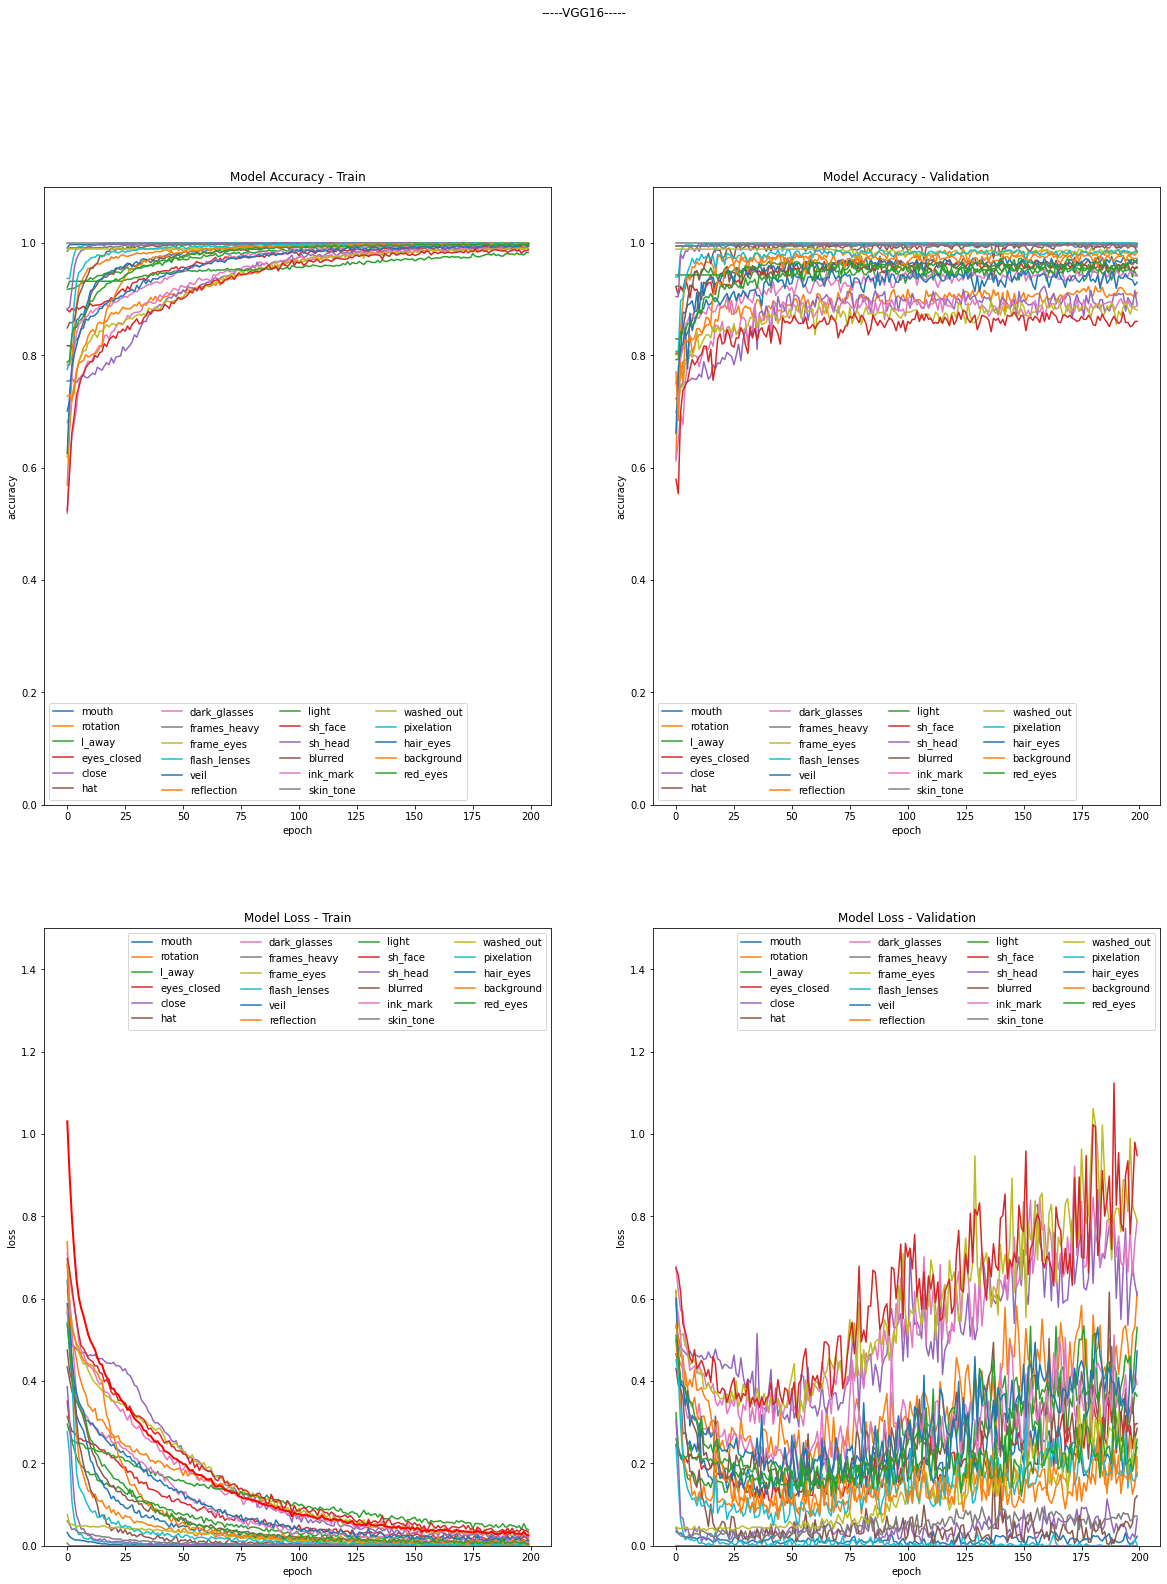

In [14]:
runner.draw_training_history()

# Load Best Model

In [7]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Model loaded
...Model path: prev_trained_models/multi_task/fvc_not_aligned/multi_reqs/ICAO-239


# Saving Trained Model

In [16]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

https://app.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-239
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Testing Trained Model
Predicting labels....
18/18 [==============================] - 37s 2s/step
Prediction finished!
Task: MOUTH


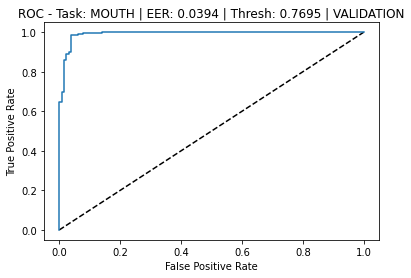

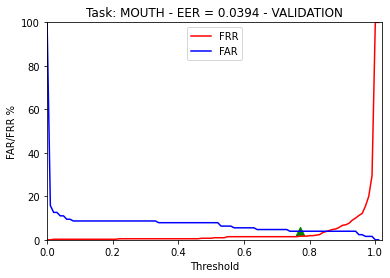

Task: MOUTH - EER_interp: 3.94% - Best Threshold: 0.7694574594426391
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.95      0.96      0.96       127
    COMPLIANT       0.99      0.99      0.99       420

     accuracy                           0.98       547
    macro avg       0.97      0.97      0.97       547
 weighted avg       0.98      0.98      0.98       547

Confusion matrix ----------------------------------------
FAR: 0.0394% | FRR: 0.0143% | EER_mean: 0.0268% | TP: 414 | TN: 122 | FP: 5 | FN: 6
Accuracy ------------------------------------------------
Model Accuracy: 97.99%
---------------------------------------------------------
Task: ROTATION


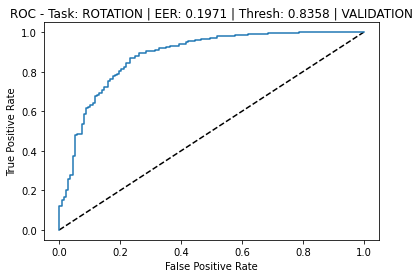

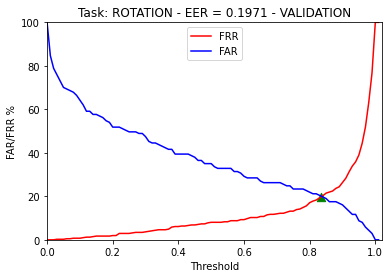

Task: ROTATION - EER_interp: 19.71% - Best Threshold: 0.8357794284818834
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.58      0.80      0.67       137
    COMPLIANT       0.92      0.80      0.86       410

     accuracy                           0.80       547
    macro avg       0.75      0.80      0.77       547
 weighted avg       0.84      0.80      0.81       547

Confusion matrix ----------------------------------------
FAR: 0.1971% | FRR: 0.1951% | EER_mean: 0.1961% | TP: 330 | TN: 110 | FP: 27 | FN: 80
Accuracy ------------------------------------------------
Model Accuracy: 80.44%
---------------------------------------------------------
Task: L_AWAY


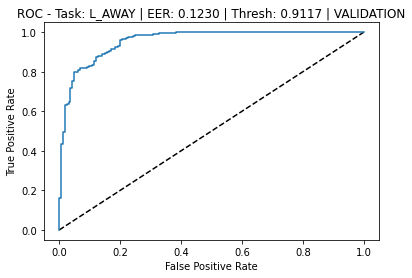

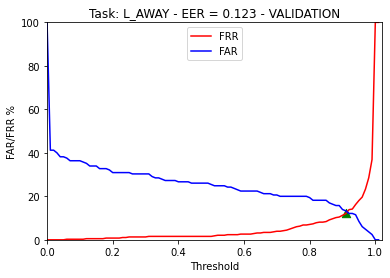

Task: L_AWAY - EER_interp: 12.3% - Best Threshold: 0.9117000358891113
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.76      0.88      0.81       165
    COMPLIANT       0.94      0.88      0.91       382

     accuracy                           0.88       547
    macro avg       0.85      0.88      0.86       547
 weighted avg       0.89      0.88      0.88       547

Confusion matrix ----------------------------------------
FAR: 0.1212% | FRR: 0.123% | EER_mean: 0.1221% | TP: 335 | TN: 145 | FP: 20 | FN: 47
Accuracy ------------------------------------------------
Model Accuracy: 87.75%
---------------------------------------------------------
Task: EYES_CLOSED


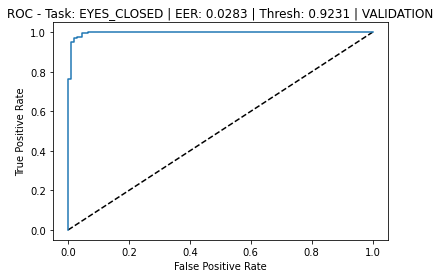

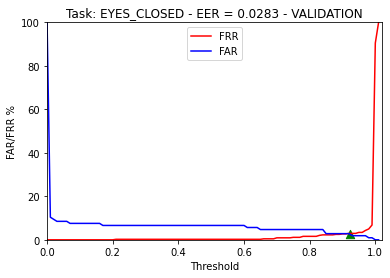

Task: EYES_CLOSED - EER_interp: 2.83% - Best Threshold: 0.9231121540085573
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.89      0.97      0.93       106
    COMPLIANT       0.99      0.97      0.98       441

     accuracy                           0.97       547
    macro avg       0.94      0.97      0.95       547
 weighted avg       0.97      0.97      0.97       547

Confusion matrix ----------------------------------------
FAR: 0.0283% | FRR: 0.0295% | EER_mean: 0.0289% | TP: 428 | TN: 103 | FP: 3 | FN: 13
Accuracy ------------------------------------------------
Model Accuracy: 97.07000000000001%
---------------------------------------------------------
Task: CLOSE


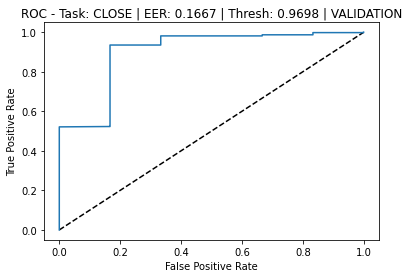

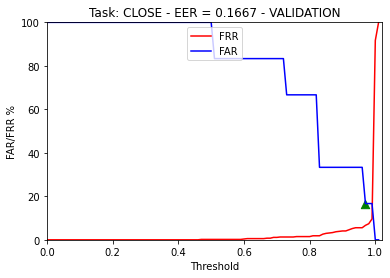

Task: CLOSE - EER_interp: 16.669999999999998% - Best Threshold: 0.9698455333709675
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.12      0.83      0.22         6
    COMPLIANT       1.00      0.94      0.97       541

     accuracy                           0.93       547
    macro avg       0.56      0.88      0.59       547
 weighted avg       0.99      0.93      0.96       547

Confusion matrix ----------------------------------------
FAR: 0.1667% | FRR: 0.0647% | EER_mean: 0.1157% | TP: 506 | TN: 5 | FP: 1 | FN: 35
Accuracy ------------------------------------------------
Model Accuracy: 93.42%
---------------------------------------------------------
Task: HAT


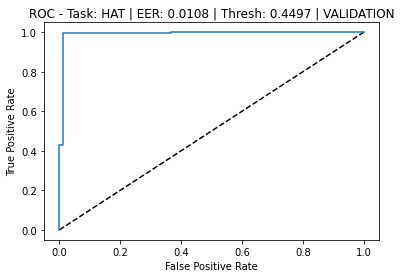

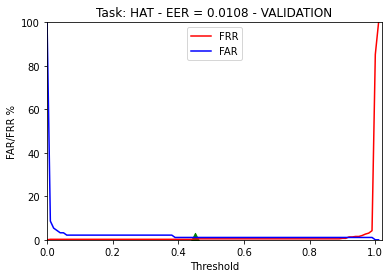

Task: HAT - EER_interp: 1.08% - Best Threshold: 0.4497106969356471
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.99      0.99      0.99        93
    COMPLIANT       1.00      1.00      1.00       454

     accuracy                           1.00       547
    macro avg       0.99      0.99      0.99       547
 weighted avg       1.00      1.00      1.00       547

Confusion matrix ----------------------------------------
FAR: 0.0108% | FRR: 0.0022% | EER_mean: 0.0065% | TP: 453 | TN: 92 | FP: 1 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.63%
---------------------------------------------------------
Task: DARK_GLASSES


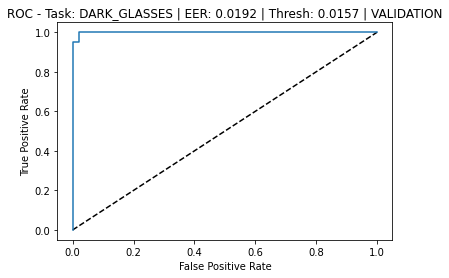

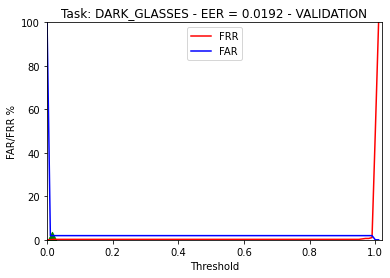

Task: DARK_GLASSES - EER_interp: 1.92% - Best Threshold: 0.015715904533841987
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.98      0.99        52
    COMPLIANT       1.00      1.00      1.00       495

     accuracy                           1.00       547
    macro avg       1.00      0.99      0.99       547
 weighted avg       1.00      1.00      1.00       547

Confusion matrix ----------------------------------------
FAR: 0.0192% | FRR: None% | EER_mean: 0.0% | TP: 495 | TN: 51 | FP: 1 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.82%
---------------------------------------------------------
Task: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


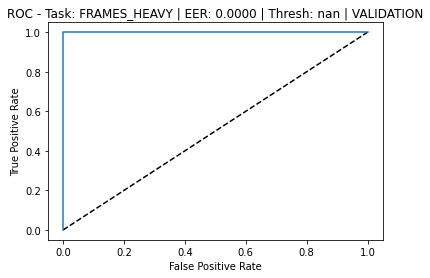

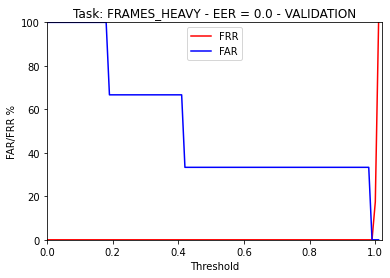

Task: FRAMES_HEAVY - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         3
    COMPLIANT       0.99      1.00      1.00       544

     accuracy                           0.99       547
    macro avg       0.50      0.50      0.50       547
 weighted avg       0.99      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: None% | FRR: None% | EER_mean: 0.0% | TP: 544 | TN: 0 | FP: 3 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.45%
---------------------------------------------------------
Task: FRAME_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


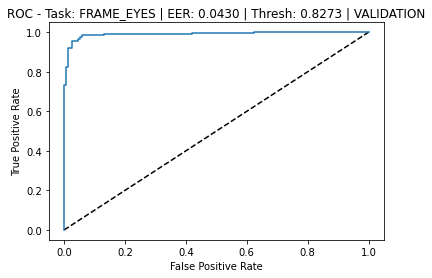

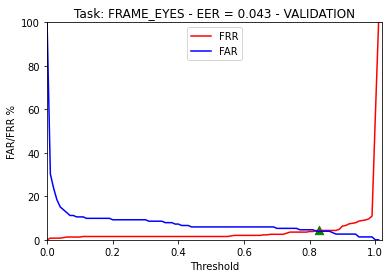

Task: FRAME_EYES - EER_interp: 4.3% - Best Threshold: 0.8272820997841754
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.90      0.96      0.93       152
    COMPLIANT       0.98      0.96      0.97       395

     accuracy                           0.96       547
    macro avg       0.94      0.96      0.95       547
 weighted avg       0.96      0.96      0.96       547

Confusion matrix ----------------------------------------
FAR: 0.0395% | FRR: 0.043% | EER_mean: 0.0412% | TP: 378 | TN: 146 | FP: 6 | FN: 17
Accuracy ------------------------------------------------
Model Accuracy: 95.8%
---------------------------------------------------------
Task: FLASH_LENSES


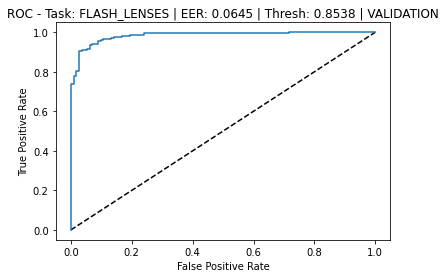

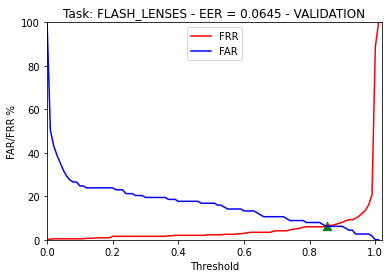

Task: FLASH_LENSES - EER_interp: 6.45% - Best Threshold: 0.853824705846582
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.79      0.94      0.86       113
    COMPLIANT       0.98      0.94      0.96       434

     accuracy                           0.94       547
    macro avg       0.89      0.94      0.91       547
 weighted avg       0.94      0.94      0.94       547

Confusion matrix ----------------------------------------
FAR: 0.0619% | FRR: 0.0645% | EER_mean: 0.0632% | TP: 406 | TN: 106 | FP: 7 | FN: 28
Accuracy ------------------------------------------------
Model Accuracy: 93.60000000000001%
---------------------------------------------------------
Task: VEIL


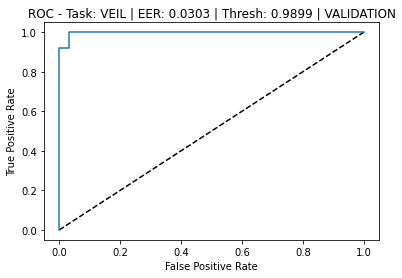

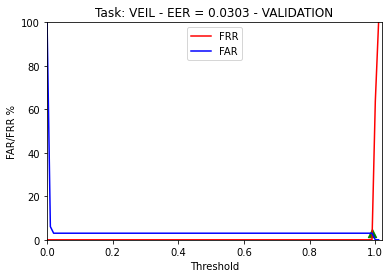

Task: VEIL - EER_interp: 3.0300000000000002% - Best Threshold: 0.9898878931996287
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.97      0.98        33
    COMPLIANT       1.00      1.00      1.00       514

     accuracy                           1.00       547
    macro avg       1.00      0.98      0.99       547
 weighted avg       1.00      1.00      1.00       547

Confusion matrix ----------------------------------------
FAR: 0.0303% | FRR: None% | EER_mean: 0.0% | TP: 514 | TN: 32 | FP: 1 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.82%
---------------------------------------------------------
Task: REFLECTION


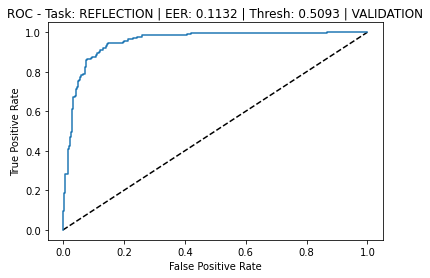

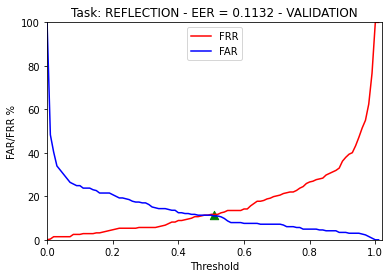

Task: REFLECTION - EER_interp: 11.32% - Best Threshold: 0.5093147158692073
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.88      0.89      0.88       265
    COMPLIANT       0.89      0.88      0.89       282

     accuracy                           0.88       547
    macro avg       0.88      0.88      0.88       547
 weighted avg       0.88      0.88      0.88       547

Confusion matrix ----------------------------------------
FAR: 0.1132% | FRR: 0.117% | EER_mean: 0.1151% | TP: 249 | TN: 235 | FP: 30 | FN: 33
Accuracy ------------------------------------------------
Model Accuracy: 88.48%
---------------------------------------------------------
Task: LIGHT


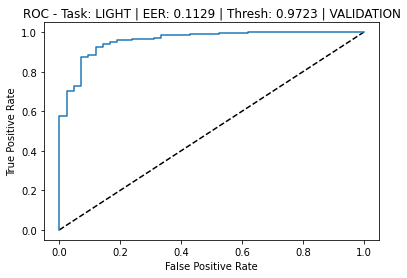

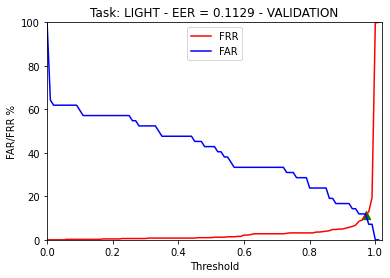

Task: LIGHT - EER_interp: 11.29% - Best Threshold: 0.9722697482250796
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.40      0.90      0.55        42
    COMPLIANT       0.99      0.89      0.94       505

     accuracy                           0.89       547
    macro avg       0.70      0.90      0.75       547
 weighted avg       0.95      0.89      0.91       547

Confusion matrix ----------------------------------------
FAR: 0.0952% | FRR: 0.1129% | EER_mean: 0.104% | TP: 448 | TN: 38 | FP: 4 | FN: 57
Accuracy ------------------------------------------------
Model Accuracy: 88.85%
---------------------------------------------------------
Task: SH_FACE


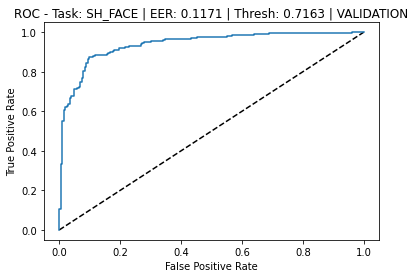

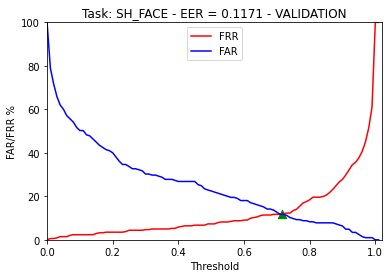

Task: SH_FACE - EER_interp: 11.709999999999999% - Best Threshold: 0.7162636518477387
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.88      0.85       205
    COMPLIANT       0.93      0.88      0.90       342

     accuracy                           0.88       547
    macro avg       0.87      0.88      0.88       547
 weighted avg       0.89      0.88      0.88       547

Confusion matrix ----------------------------------------
FAR: 0.1171% | FRR: 0.117% | EER_mean: 0.117% | TP: 302 | TN: 181 | FP: 24 | FN: 40
Accuracy ------------------------------------------------
Model Accuracy: 88.3%
---------------------------------------------------------
Task: SH_HEAD


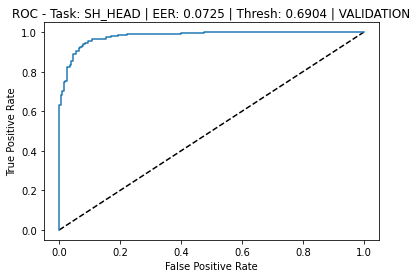

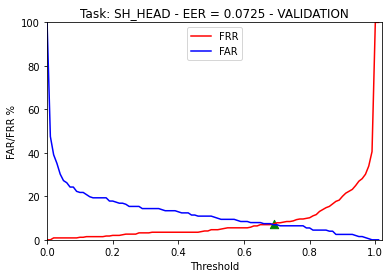

Task: SH_HEAD - EER_interp: 7.249999999999999% - Best Threshold: 0.6903637207072643
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.88      0.93      0.91       202
    COMPLIANT       0.96      0.93      0.94       345

     accuracy                           0.93       547
    macro avg       0.92      0.93      0.92       547
 weighted avg       0.93      0.93      0.93       547

Confusion matrix ----------------------------------------
FAR: 0.0693% | FRR: 0.0725% | EER_mean: 0.0709% | TP: 320 | TN: 188 | FP: 14 | FN: 25
Accuracy ------------------------------------------------
Model Accuracy: 92.86999999999999%
---------------------------------------------------------
Task: BLURRED


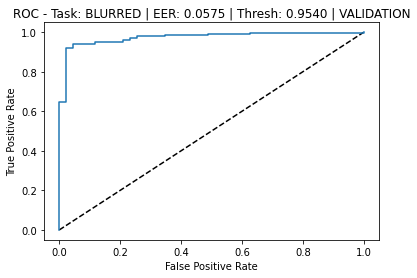

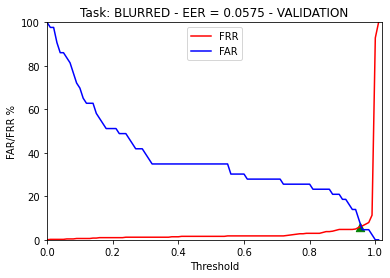

Task: BLURRED - EER_interp: 5.75% - Best Threshold: 0.9539841332685061
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.58      0.93      0.71        43
    COMPLIANT       0.99      0.94      0.97       504

     accuracy                           0.94       547
    macro avg       0.79      0.94      0.84       547
 weighted avg       0.96      0.94      0.95       547

Confusion matrix ----------------------------------------
FAR: 0.0698% | FRR: 0.0575% | EER_mean: 0.0636% | TP: 475 | TN: 40 | FP: 3 | FN: 29
Accuracy ------------------------------------------------
Model Accuracy: 94.15%
---------------------------------------------------------
Task: SKIN_TONE


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


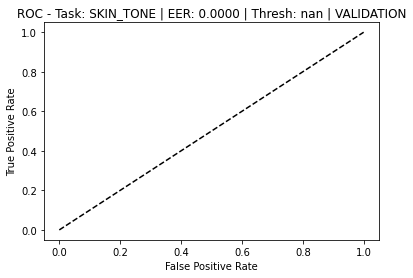

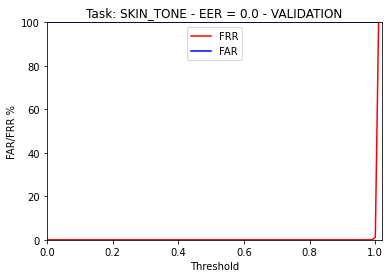

Task: SKIN_TONE - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         0
    COMPLIANT       1.00      1.00      1.00       547

    micro avg       1.00      1.00      1.00       547
    macro avg       0.50      0.50      0.50       547
 weighted avg       1.00      1.00      1.00       547

Confusion matrix ----------------------------------------
FAR: None% | FRR: None% | EER_mean: 0.0% | TP: 547 | TN: 0 | FP: 0 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 100.0%
---------------------------------------------------------
Task: WASHED_OUT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


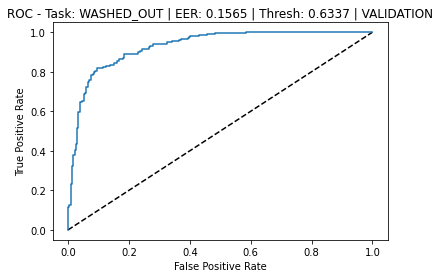

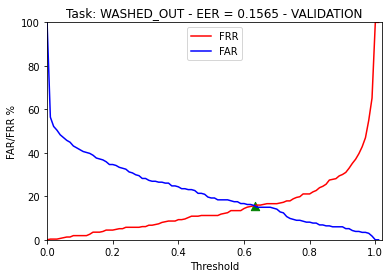

Task: WASHED_OUT - EER_interp: 15.65% - Best Threshold: 0.6337441384030607
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.80      0.85      0.82       234
    COMPLIANT       0.88      0.84      0.86       313

     accuracy                           0.84       547
    macro avg       0.84      0.84      0.84       547
 weighted avg       0.85      0.84      0.85       547

Confusion matrix ----------------------------------------
FAR: 0.1538% | FRR: 0.1565% | EER_mean: 0.1552% | TP: 264 | TN: 198 | FP: 36 | FN: 49
Accuracy ------------------------------------------------
Model Accuracy: 84.46000000000001%
---------------------------------------------------------
Task: PIXELATION


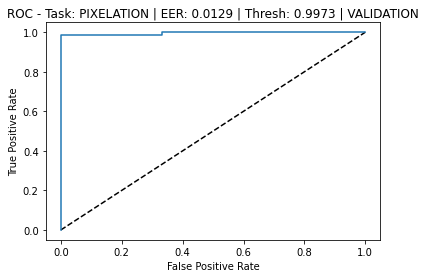

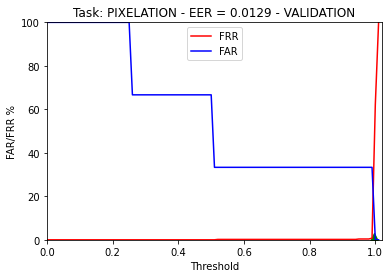

Task: PIXELATION - EER_interp: 1.29% - Best Threshold: 0.997269391137011
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.30      1.00      0.46         3
    COMPLIANT       1.00      0.99      0.99       544

     accuracy                           0.99       547
    macro avg       0.65      0.99      0.73       547
 weighted avg       1.00      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: None% | FRR: 0.0129% | EER_mean: 0.0% | TP: 537 | TN: 3 | FP: 0 | FN: 7
Accuracy ------------------------------------------------
Model Accuracy: 98.72%
---------------------------------------------------------
Task: HAIR_EYES


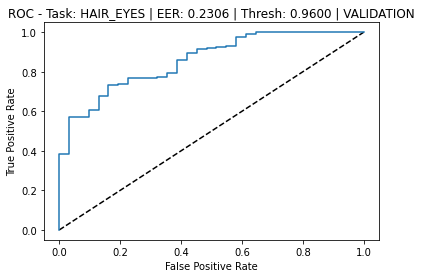

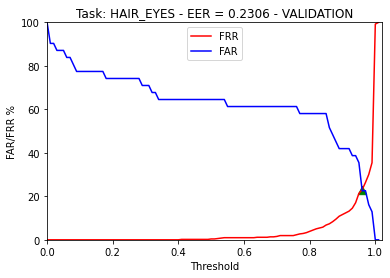

Task: HAIR_EYES - EER_interp: 23.06% - Best Threshold: 0.9600094898341642
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.17      0.77      0.28        31
    COMPLIANT       0.98      0.77      0.86       516

     accuracy                           0.77       547
    macro avg       0.58      0.77      0.57       547
 weighted avg       0.94      0.77      0.83       547

Confusion matrix ----------------------------------------
FAR: 0.2258% | FRR: 0.2306% | EER_mean: 0.2282% | TP: 397 | TN: 24 | FP: 7 | FN: 119
Accuracy ------------------------------------------------
Model Accuracy: 76.97%
---------------------------------------------------------
Task: BACKGROUND


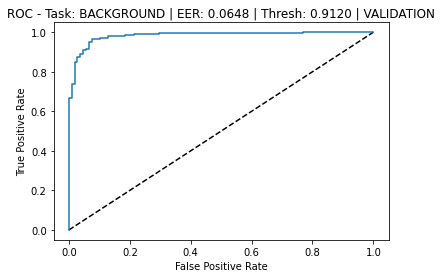

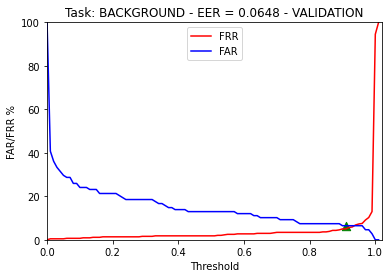

Task: BACKGROUND - EER_interp: 6.4799999999999995% - Best Threshold: 0.912026166914807
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.94      0.87       108
    COMPLIANT       0.98      0.95      0.97       439

     accuracy                           0.95       547
    macro avg       0.90      0.94      0.92       547
 weighted avg       0.95      0.95      0.95       547

Confusion matrix ----------------------------------------
FAR: 0.0648% | FRR: 0.0501% | EER_mean: 0.0574% | TP: 417 | TN: 101 | FP: 7 | FN: 22
Accuracy ------------------------------------------------
Model Accuracy: 94.69999999999999%
---------------------------------------------------------
Task: RED_EYES


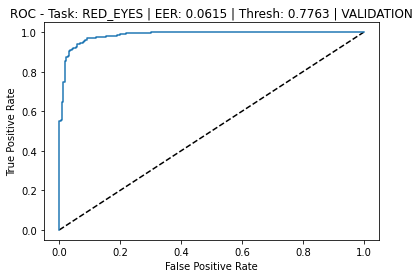

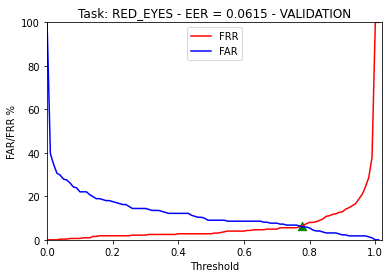

Task: RED_EYES - EER_interp: 6.15% - Best Threshold: 0.7763350780193622
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.91      0.94      0.92       222
    COMPLIANT       0.96      0.94      0.95       325

     accuracy                           0.94       547
    macro avg       0.93      0.94      0.94       547
 weighted avg       0.94      0.94      0.94       547

Confusion matrix ----------------------------------------
FAR: 0.0631% | FRR: 0.0615% | EER_mean: 0.0623% | TP: 305 | TN: 208 | FP: 14 | FN: 20
Accuracy ------------------------------------------------
Model Accuracy: 93.78%
---------------------------------------------------------
  Task  0: mouth           | EER_mean: 0.03940 | EER_interp: 0.02680 | ACC: 0.97990
  Task  1: rotation        | EER_mean: 0.19710 | EER_interp: 0.19610 | ACC: 0.80440
  Task  2: l_away          | EER_mean: 0.12300 | EER_interp: 0.12210 | ACC: 0.87750
  

Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.


In [8]:
import neptune.new as neptune

old_neptune_run = runner.neptune_utils.neptune_run

runner.model_evaluator.neptune_run = neptune.init(run='ICAO-239')
runner.config_interp.use_neptune = True

runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 16s 2s/step
Prediction finished!
Task: MOUTH


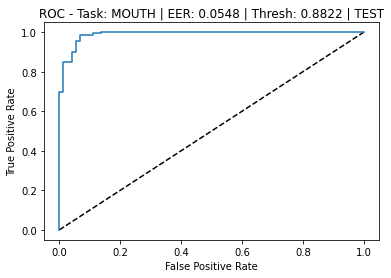

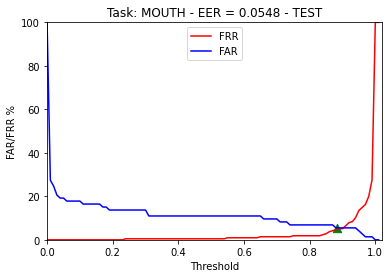

Task: MOUTH - EER_interp: 5.48% - Best Threshold: 0.8821954727170932
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.87      0.95      0.91        73
    COMPLIANT       0.98      0.95      0.97       215

     accuracy                           0.95       288
    macro avg       0.93      0.95      0.94       288
 weighted avg       0.95      0.95      0.95       288

Confusion matrix ----------------------------------------
FAR: 0.0548% | FRR: 0.0465% | EER_mean: 0.0506% | TP: 205 | TN: 69 | FP: 4 | FN: 10
Accuracy ------------------------------------------------
Model Accuracy: 95.14%
---------------------------------------------------------
Task: ROTATION


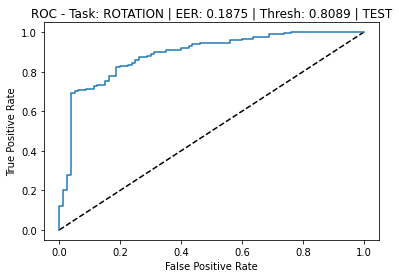

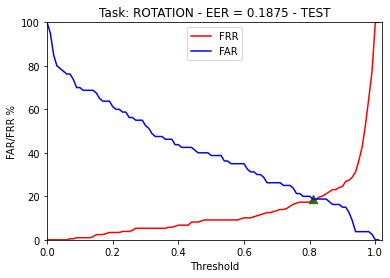

Task: ROTATION - EER_interp: 18.75% - Best Threshold: 0.8089422583579947
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.64      0.81      0.71        80
    COMPLIANT       0.92      0.82      0.87       208

     accuracy                           0.82       288
    macro avg       0.78      0.82      0.79       288
 weighted avg       0.84      0.82      0.83       288

Confusion matrix ----------------------------------------
FAR: 0.1875% | FRR: 0.1779% | EER_mean: 0.1827% | TP: 171 | TN: 65 | FP: 15 | FN: 37
Accuracy ------------------------------------------------
Model Accuracy: 81.94%
---------------------------------------------------------
Task: L_AWAY


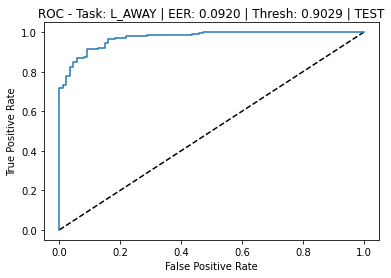

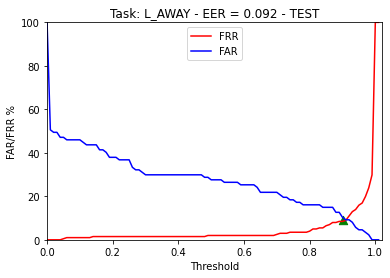

Task: L_AWAY - EER_interp: 9.2% - Best Threshold: 0.902853012084721
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.91      0.86        87
    COMPLIANT       0.96      0.92      0.94       201

     accuracy                           0.91       288
    macro avg       0.89      0.91      0.90       288
 weighted avg       0.92      0.91      0.91       288

Confusion matrix ----------------------------------------
FAR: 0.092% | FRR: 0.0846% | EER_mean: 0.0883% | TP: 184 | TN: 79 | FP: 8 | FN: 17
Accuracy ------------------------------------------------
Model Accuracy: 91.32000000000001%
---------------------------------------------------------
Task: EYES_CLOSED


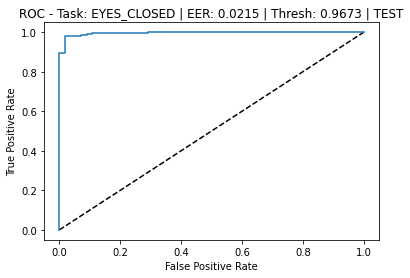

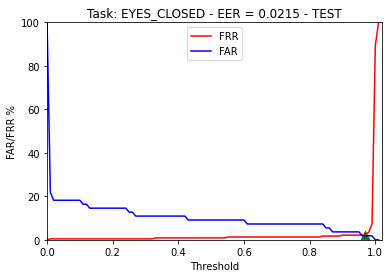

Task: EYES_CLOSED - EER_interp: 2.15% - Best Threshold: 0.9673066456429753
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.92      0.98      0.95        55
    COMPLIANT       1.00      0.98      0.99       233

     accuracy                           0.98       288
    macro avg       0.96      0.98      0.97       288
 weighted avg       0.98      0.98      0.98       288

Confusion matrix ----------------------------------------
FAR: 0.0182% | FRR: 0.0215% | EER_mean: 0.0198% | TP: 228 | TN: 54 | FP: 1 | FN: 5
Accuracy ------------------------------------------------
Model Accuracy: 97.92%
---------------------------------------------------------
Task: CLOSE


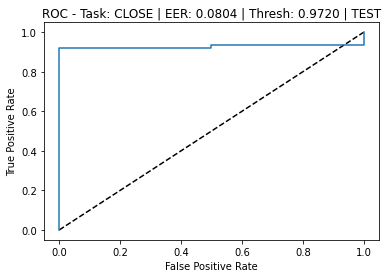

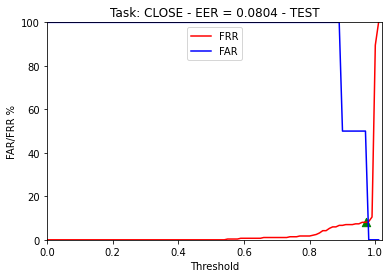

Task: CLOSE - EER_interp: 8.04% - Best Threshold: 0.9719628170653658
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.08      1.00      0.15         2
    COMPLIANT       1.00      0.92      0.96       286

     accuracy                           0.92       288
    macro avg       0.54      0.96      0.55       288
 weighted avg       0.99      0.92      0.95       288

Confusion matrix ----------------------------------------
FAR: None% | FRR: 0.0804% | EER_mean: 0.0% | TP: 263 | TN: 2 | FP: 0 | FN: 23
Accuracy ------------------------------------------------
Model Accuracy: 92.01%
---------------------------------------------------------
Task: HAT


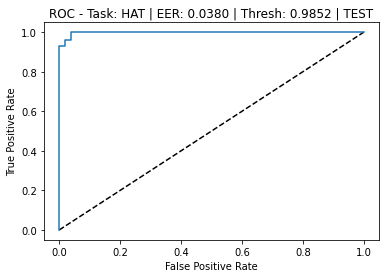

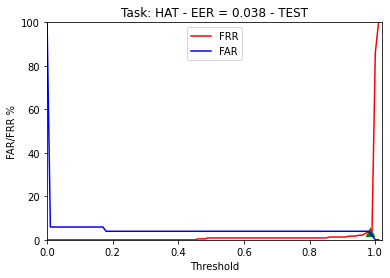

Task: HAT - EER_interp: 3.8% - Best Threshold: 0.9851728972000415
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.85      0.98      0.91        51
    COMPLIANT       1.00      0.96      0.98       237

     accuracy                           0.97       288
    macro avg       0.92      0.97      0.94       288
 weighted avg       0.97      0.97      0.97       288

Confusion matrix ----------------------------------------
FAR: 0.0196% | FRR: 0.038% | EER_mean: 0.0288% | TP: 228 | TN: 50 | FP: 1 | FN: 9
Accuracy ------------------------------------------------
Model Accuracy: 96.53%
---------------------------------------------------------
Task: DARK_GLASSES


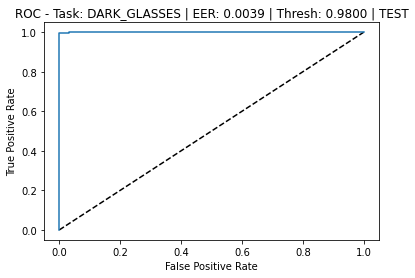

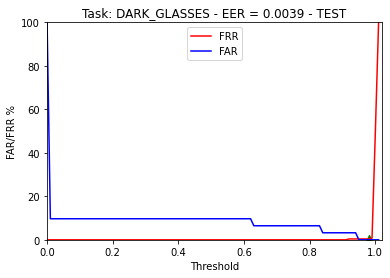

Task: DARK_GLASSES - EER_interp: 0.38999999999999996% - Best Threshold: 0.9799710952818163
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.97      1.00      0.98        31
    COMPLIANT       1.00      1.00      1.00       257

     accuracy                           1.00       288
    macro avg       0.98      1.00      0.99       288
 weighted avg       1.00      1.00      1.00       288

Confusion matrix ----------------------------------------
FAR: None% | FRR: 0.0039% | EER_mean: 0.0% | TP: 256 | TN: 31 | FP: 0 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.65%
---------------------------------------------------------
Task: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


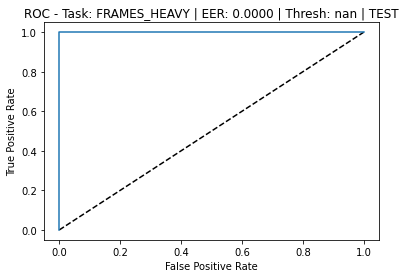

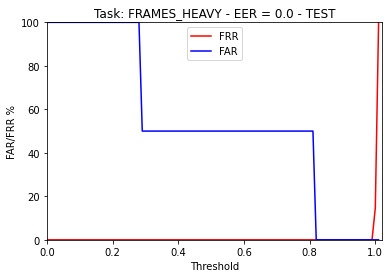

Task: FRAMES_HEAVY - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         2
    COMPLIANT       0.99      1.00      1.00       286

     accuracy                           0.99       288
    macro avg       0.50      0.50      0.50       288
 weighted avg       0.99      0.99      0.99       288

Confusion matrix ----------------------------------------
FAR: None% | FRR: None% | EER_mean: 0.0% | TP: 286 | TN: 0 | FP: 2 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.31%
---------------------------------------------------------
Task: FRAME_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


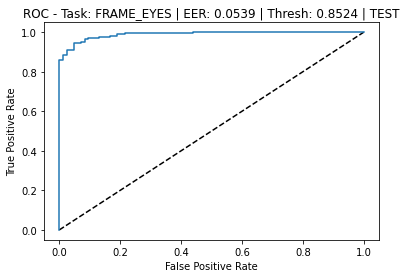

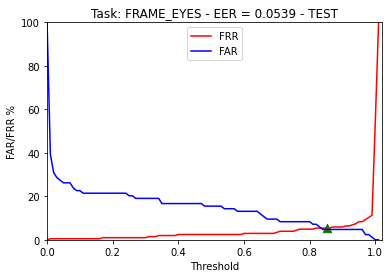

Task: FRAME_EYES - EER_interp: 5.390000000000001% - Best Threshold: 0.8523577556890598
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.88      0.95      0.91        84
    COMPLIANT       0.98      0.95      0.96       204

     accuracy                           0.95       288
    macro avg       0.93      0.95      0.94       288
 weighted avg       0.95      0.95      0.95       288

Confusion matrix ----------------------------------------
FAR: 0.0476% | FRR: 0.0539% | EER_mean: 0.0508% | TP: 193 | TN: 80 | FP: 4 | FN: 11
Accuracy ------------------------------------------------
Model Accuracy: 94.78999999999999%
---------------------------------------------------------
Task: FLASH_LENSES


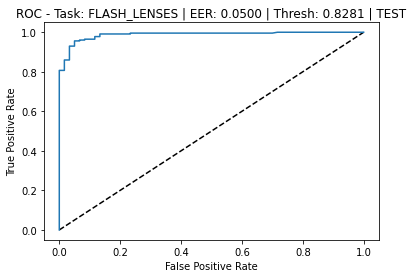

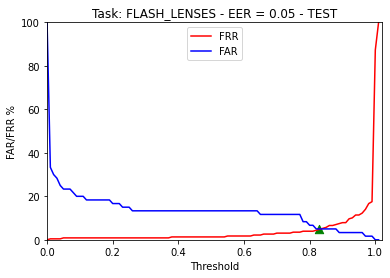

Task: FLASH_LENSES - EER_interp: 5.0% - Best Threshold: 0.8281456828117062
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.85      0.95      0.90        60
    COMPLIANT       0.99      0.96      0.97       228

     accuracy                           0.95       288
    macro avg       0.92      0.95      0.93       288
 weighted avg       0.96      0.95      0.96       288

Confusion matrix ----------------------------------------
FAR: 0.05% | FRR: 0.0439% | EER_mean: 0.047% | TP: 218 | TN: 57 | FP: 3 | FN: 10
Accuracy ------------------------------------------------
Model Accuracy: 95.49%
---------------------------------------------------------
Task: VEIL


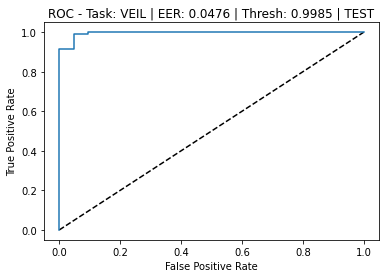

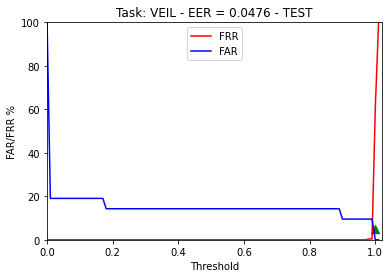

Task: VEIL - EER_interp: 4.760000000000001% - Best Threshold: 0.998517811298368
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.87      0.95      0.91        21
    COMPLIANT       1.00      0.99      0.99       267

     accuracy                           0.99       288
    macro avg       0.93      0.97      0.95       288
 weighted avg       0.99      0.99      0.99       288

Confusion matrix ----------------------------------------
FAR: 0.0476% | FRR: 0.0112% | EER_mean: 0.0294% | TP: 264 | TN: 20 | FP: 1 | FN: 3
Accuracy ------------------------------------------------
Model Accuracy: 98.61%
---------------------------------------------------------
Task: REFLECTION


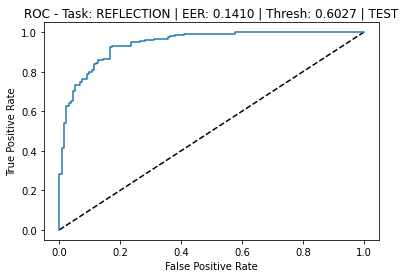

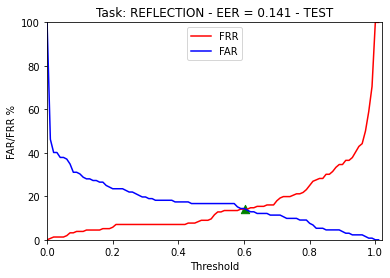

Task: REFLECTION - EER_interp: 14.099999999999998% - Best Threshold: 0.6026893189320198
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.84      0.86      0.85       132
    COMPLIANT       0.88      0.86      0.87       156

     accuracy                           0.86       288
    macro avg       0.86      0.86      0.86       288
 weighted avg       0.86      0.86      0.86       288

Confusion matrix ----------------------------------------
FAR: 0.1364% | FRR: 0.141% | EER_mean: 0.1387% | TP: 134 | TN: 114 | FP: 18 | FN: 22
Accuracy ------------------------------------------------
Model Accuracy: 86.11%
---------------------------------------------------------
Task: LIGHT


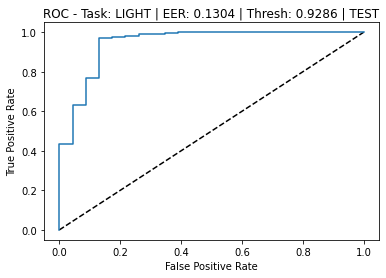

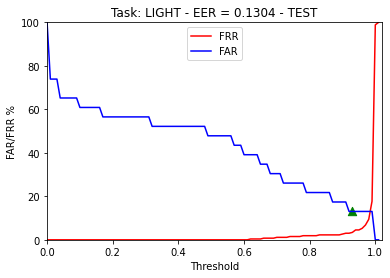

Task: LIGHT - EER_interp: 13.04% - Best Threshold: 0.9286167025563135
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.71      0.87      0.78        23
    COMPLIANT       0.99      0.97      0.98       265

     accuracy                           0.96       288
    macro avg       0.85      0.92      0.88       288
 weighted avg       0.97      0.96      0.96       288

Confusion matrix ----------------------------------------
FAR: 0.1304% | FRR: 0.0302% | EER_mean: 0.0803% | TP: 257 | TN: 20 | FP: 3 | FN: 8
Accuracy ------------------------------------------------
Model Accuracy: 96.17999999999999%
---------------------------------------------------------
Task: SH_FACE


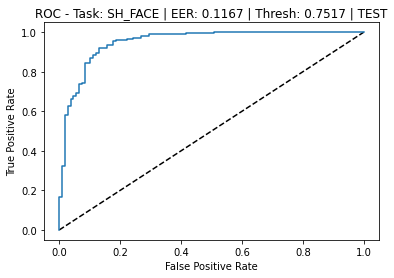

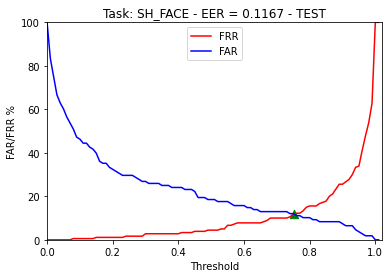

Task: SH_FACE - EER_interp: 11.67% - Best Threshold: 0.7516600012779243
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.89      0.85       108
    COMPLIANT       0.93      0.88      0.91       180

     accuracy                           0.89       288
    macro avg       0.88      0.89      0.88       288
 weighted avg       0.89      0.89      0.89       288

Confusion matrix ----------------------------------------
FAR: 0.1111% | FRR: 0.1167% | EER_mean: 0.1139% | TP: 159 | TN: 96 | FP: 12 | FN: 21
Accuracy ------------------------------------------------
Model Accuracy: 88.53999999999999%
---------------------------------------------------------
Task: SH_HEAD


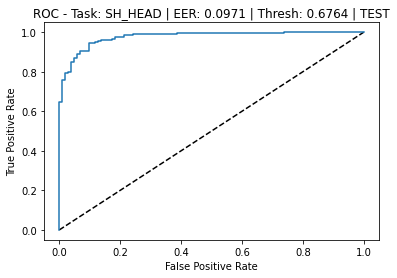

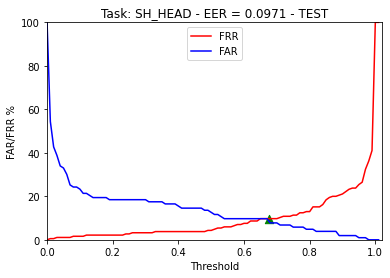

Task: SH_HEAD - EER_interp: 9.71% - Best Threshold: 0.6763824224490371
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.84      0.90      0.87       103
    COMPLIANT       0.94      0.90      0.92       185

     accuracy                           0.90       288
    macro avg       0.89      0.90      0.90       288
 weighted avg       0.91      0.90      0.90       288

Confusion matrix ----------------------------------------
FAR: 0.0971% | FRR: 0.0973% | EER_mean: 0.0972% | TP: 167 | TN: 93 | FP: 10 | FN: 18
Accuracy ------------------------------------------------
Model Accuracy: 90.28%
---------------------------------------------------------
Task: BLURRED


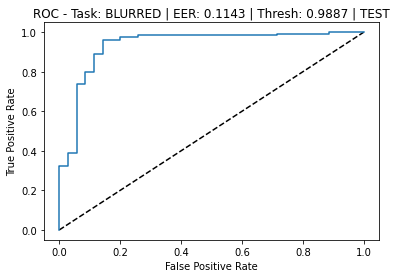

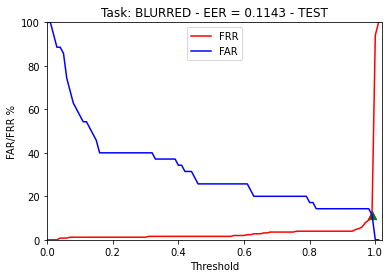

Task: BLURRED - EER_interp: 11.43% - Best Threshold: 0.9886652231216415
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.53      0.89      0.66        35
    COMPLIANT       0.98      0.89      0.93       253

     accuracy                           0.89       288
    macro avg       0.75      0.89      0.80       288
 weighted avg       0.93      0.89      0.90       288

Confusion matrix ----------------------------------------
FAR: 0.1143% | FRR: 0.1107% | EER_mean: 0.1125% | TP: 225 | TN: 31 | FP: 4 | FN: 28
Accuracy ------------------------------------------------
Model Accuracy: 88.89%
---------------------------------------------------------
Task: SKIN_TONE


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


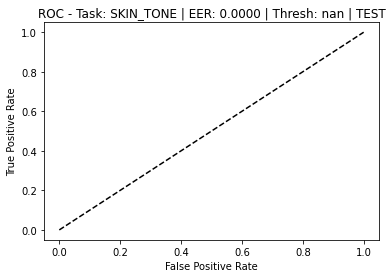

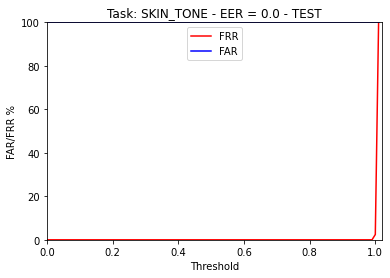

Task: SKIN_TONE - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         0
    COMPLIANT       1.00      1.00      1.00       288

    micro avg       1.00      1.00      1.00       288
    macro avg       0.50      0.50      0.50       288
 weighted avg       1.00      1.00      1.00       288

Confusion matrix ----------------------------------------
FAR: None% | FRR: None% | EER_mean: 0.0% | TP: 288 | TN: 0 | FP: 0 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 100.0%
---------------------------------------------------------
Task: WASHED_OUT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


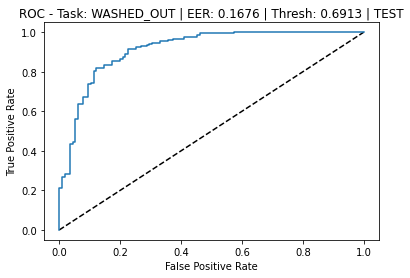

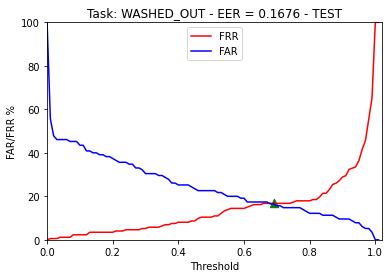

Task: WASHED_OUT - EER_interp: 16.76% - Best Threshold: 0.6912822731428253
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.77      0.83      0.80       115
    COMPLIANT       0.88      0.83      0.86       173

     accuracy                           0.83       288
    macro avg       0.83      0.83      0.83       288
 weighted avg       0.84      0.83      0.83       288

Confusion matrix ----------------------------------------
FAR: 0.1652% | FRR: 0.1676% | EER_mean: 0.1664% | TP: 144 | TN: 96 | FP: 19 | FN: 29
Accuracy ------------------------------------------------
Model Accuracy: 83.33%
---------------------------------------------------------
Task: PIXELATION


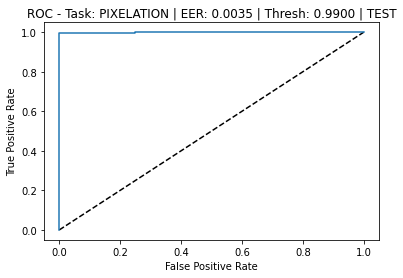

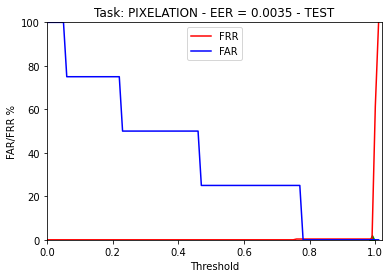

Task: PIXELATION - EER_interp: 0.35000000000000003% - Best Threshold: 0.9899834192974466
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.80      1.00      0.89         4
    COMPLIANT       1.00      1.00      1.00       284

     accuracy                           1.00       288
    macro avg       0.90      1.00      0.94       288
 weighted avg       1.00      1.00      1.00       288

Confusion matrix ----------------------------------------
FAR: None% | FRR: 0.0035% | EER_mean: 0.0% | TP: 283 | TN: 4 | FP: 0 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.65%
---------------------------------------------------------
Task: HAIR_EYES


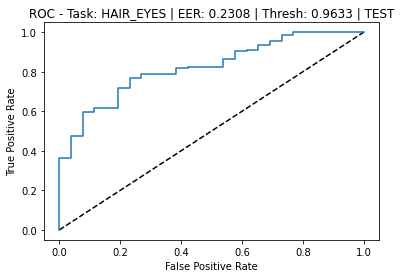

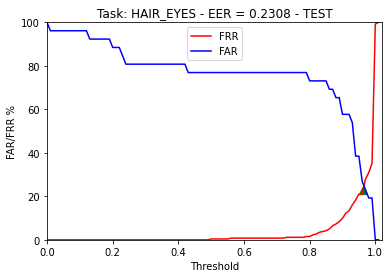

Task: HAIR_EYES - EER_interp: 23.080000000000002% - Best Threshold: 0.9633193612098525
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.25      0.77      0.38        26
    COMPLIANT       0.97      0.77      0.86       262

     accuracy                           0.77       288
    macro avg       0.61      0.77      0.62       288
 weighted avg       0.91      0.77      0.82       288

Confusion matrix ----------------------------------------
FAR: 0.2308% | FRR: 0.229% | EER_mean: 0.2299% | TP: 202 | TN: 20 | FP: 6 | FN: 60
Accuracy ------------------------------------------------
Model Accuracy: 77.08%
---------------------------------------------------------
Task: BACKGROUND


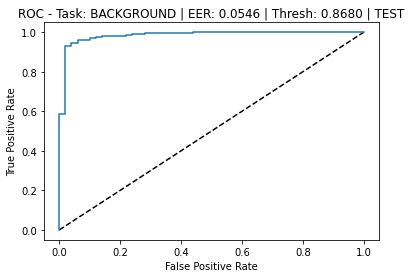

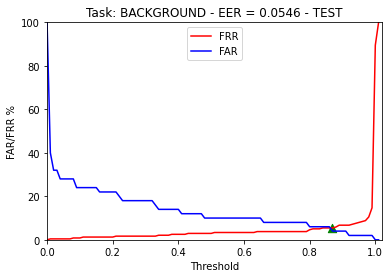

Task: BACKGROUND - EER_interp: 5.46% - Best Threshold: 0.8679941431814883
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.79      0.96      0.86        50
    COMPLIANT       0.99      0.95      0.97       238

     accuracy                           0.95       288
    macro avg       0.89      0.95      0.92       288
 weighted avg       0.96      0.95      0.95       288

Confusion matrix ----------------------------------------
FAR: 0.04% | FRR: 0.0546% | EER_mean: 0.0473% | TP: 225 | TN: 48 | FP: 2 | FN: 13
Accuracy ------------------------------------------------
Model Accuracy: 94.78999999999999%
---------------------------------------------------------
Task: RED_EYES


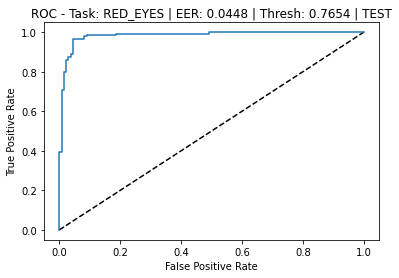

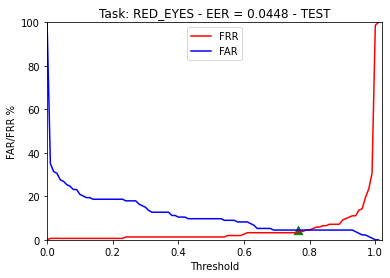

Task: RED_EYES - EER_interp: 4.4799999999999995% - Best Threshold: 0.7653592228797206
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.96      0.96      0.96       134
    COMPLIANT       0.96      0.97      0.96       154

     accuracy                           0.96       288
    macro avg       0.96      0.96      0.96       288
 weighted avg       0.96      0.96      0.96       288

Confusion matrix ----------------------------------------
FAR: 0.0448% | FRR: 0.0325% | EER_mean: 0.0387% | TP: 149 | TN: 128 | FP: 6 | FN: 5
Accuracy ------------------------------------------------
Model Accuracy: 96.17999999999999%
---------------------------------------------------------
  Task  0: mouth           | EER_mean: 0.05480 | EER_interp: 0.05060 | ACC: 0.95140
  Task  1: rotation        | EER_mean: 0.18750 | EER_interp: 0.18270 | ACC: 0.81940
  Task  2: l_away          | EER_mean: 0.09200 | EER_interp: 0

Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.


In [9]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

In [10]:
runner.config_interp.use_neptune = False
runner.model_evaluator.neptune_run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 5 operations to synchronize with Neptune. Do not kill this process.
All 5 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-239


# Visualize Model Classification

# Finishing Experiment Manager

In [11]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Not using Neptune
